# Project. Financial Analysis on Twitter

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

### Description

In [ ]:
full_name = 'Hadi Hadavi'
student_id = '99100263'
github = 'https://github.com/MHH7/Financial-Analysis-on-Twitter'
drive = 'https://drive.google.com/drive/u/0/folders/1CuGvOZVO8if3abS8BUrOiFvJdBsUctFa?q=parent:1CuGvOZVO8if3abS8BUrOiFvJdBsUctFa'

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from tqdm import tqdm

In [8]:
from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/data/'
os.chdir(folder_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 Exploratory Data Analysis

### Loading Datasets

In [9]:
# Read "companies.csv" into a DataFrame
companies_df = pd.read_csv('./companies.csv')

# Read "entities.csv" into a DataFrame
entities_df = pd.read_csv('./entities.csv')

# Read "training.1600000.processed.noemoticon.csv" into a DataFrame
training_df = pd.read_csv('./training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1")

# Read "tweets.csv" into a DataFrame
tweets_df = pd.read_csv('./tweets.csv')

# Read "users.csv" into a DataFrame, skipping lines with different numbers of fields
users_df = pd.read_csv('./users.csv', on_bad_lines='skip')

# Previewing
print("Companies: \n",companies_df.head())
print("Entities: \n",entities_df.head())
print("Trainings: \n",training_df.head())
print("Tweets: \n",tweets_df.head())

<ipython-input-9-e1e7e164a0b9>:14: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  users_df = pd.read_csv('./users.csv', on_bad_lines='skip')


Companies: 
   ticker                  name exchange  capitalization
0      A  Agilent Technologies     NYSE    1.915000e+10
1     AA            Alcoa Corp     NYSE    6.480000e+09
2   AAAG  AAA Century Group US  OTCMKTS    9.480000e+06
3  AAAIF  ALTERNATIVE INV TR N  OTCMKTS    7.840000e+06
4  AAALF    AAREAL BANK AG NPV  OTCMKTS    1.720000e+09
Entities: 
              tweet_id entity_type  \
0  865191269030612992         url   
1  865191269030612992      symbol   
2  865191271899570176         url   
3  865191271899570176     hashtag   
4  865191271899570176     hashtag   

                                                text  
0  http://ih.advfn.com/p.php?pid=nmona&article=74...  
1                                               AMGN  
2  https://finance.yahoo.com/news/amgen-submits-b...  
3                                                FDA  
4                                            biotech  
Trainings: 
    0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_ 

In [ ]:
print("Tweets: \n",tweets_df.head())
print("Users: \n",users_df.head())

Tweets: 
                    id                                               text  \
0  865326129644797957  RT @cruzfloresiv: To all the weak hands who so...   
1  865326133008642049  Investors Eye Fed, But Bond ETFs Still Add Ass...   
2  865326134262681600  Sell $NLNK (Ne❑wLink Genetics Corporation) tha...   
3  865326134917050368  Increase: $VCO $NTES $BPT $ENIC $QIWI $JP $STX...   
4  865326135952855040  Former #FDA commissioner Califf joins Verily, ...   

              user_id  in_reply_to_status_id  in_reply_to_user_id  \
0  859451814940336128                      0                    0   
1            44060322                      0                    0   
2  713570637306986496                      0                    0   
3  823239593151655936                      0                    0   
4            44367489                      0                    0   

   retweeted_status_id  retweeted_user_id lang  \
0   865323140531896320         3005609114   en   
1                 

### Most and Least tweeted stocks

<ipython-input-39-a72b159c9907>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tweet_count', y='name', data=combined_df, palette="coolwarm")


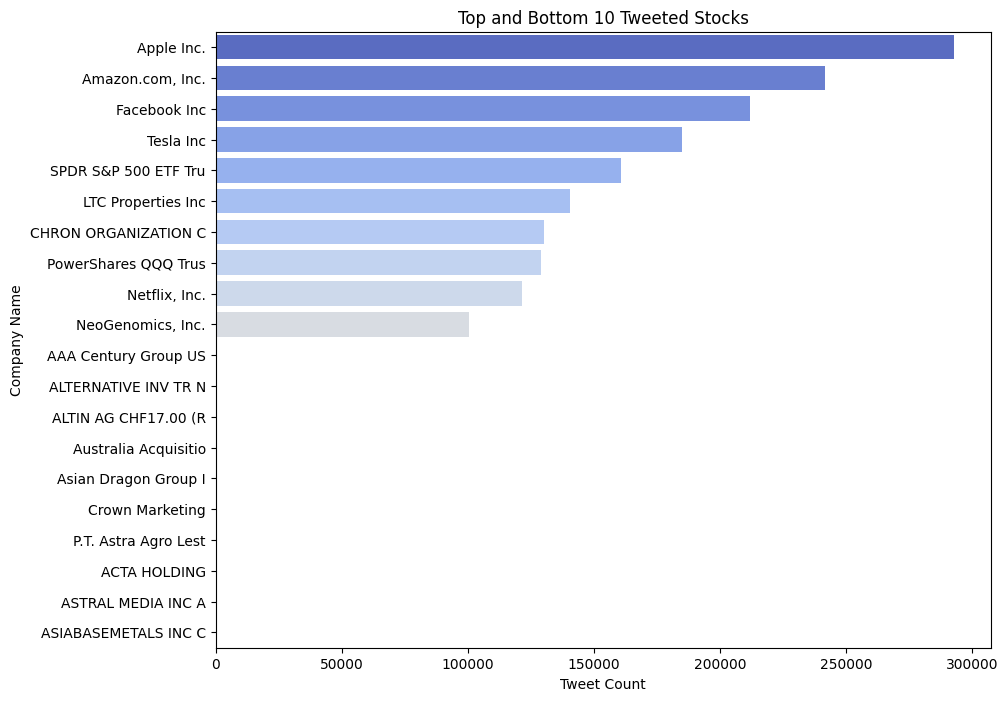

In [ ]:
# Count how many times each cashtag appears
cashtag_counts = entities_df['text'].value_counts()

# Add the counts to the companies dataframe
companies_df['tweet_count'] = companies_df['ticker'].map(cashtag_counts)

# Fill NaN values with 0 for companies that were not tweeted about
companies_df['tweet_count'].fillna(0, inplace=True)

# Top 10 most and 10 least tweeted stocks
top_10 = companies_df.nlargest(10, 'tweet_count')
bottom_10 = companies_df.nsmallest(10, 'tweet_count')

# Combine top and bottom dataframes
combined_df = pd.concat([top_10, bottom_10])

# Plotting the 10 most and 10 least tweeted stocks
plt.figure(figsize=(10, 8))
sns.barplot(x='tweet_count', y='name', data=combined_df, palette="coolwarm")
plt.title('Top and Bottom 10 Tweeted Stocks')
plt.xlabel('Tweet Count')
plt.ylabel('Company Name')
plt.show()

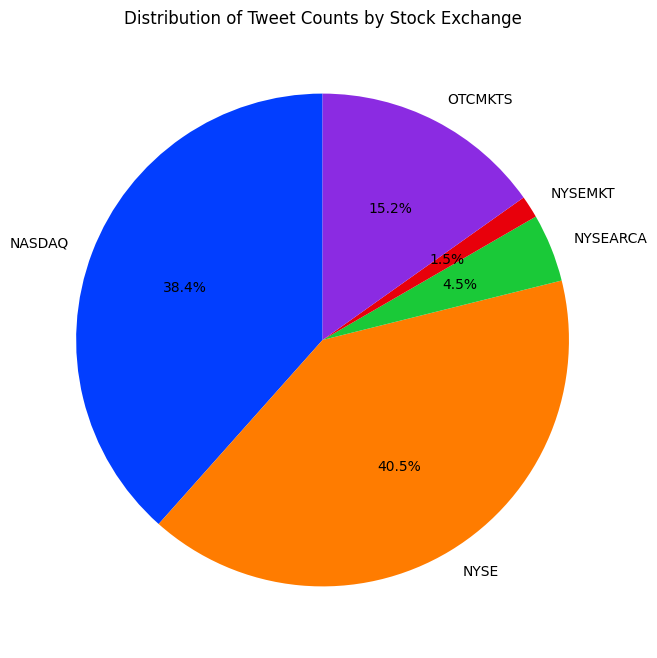

In [ ]:
# Convert capitalization to millions for better visualization
companies_df['capitalization'] = companies_df['capitalization'] / (10 ** 6)

# Prepare data for pie chart
tweet_counts_by_exchange = companies_df.groupby('exchange')['tweet_count'].sum()

# Use pie chart for tweet counts by exchange
plt.figure(figsize=(10, 8))
plt.pie(tweet_counts_by_exchange, labels=tweet_counts_by_exchange.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('bright'))
plt.title('Distribution of Tweet Counts by Stock Exchange')
plt.show()

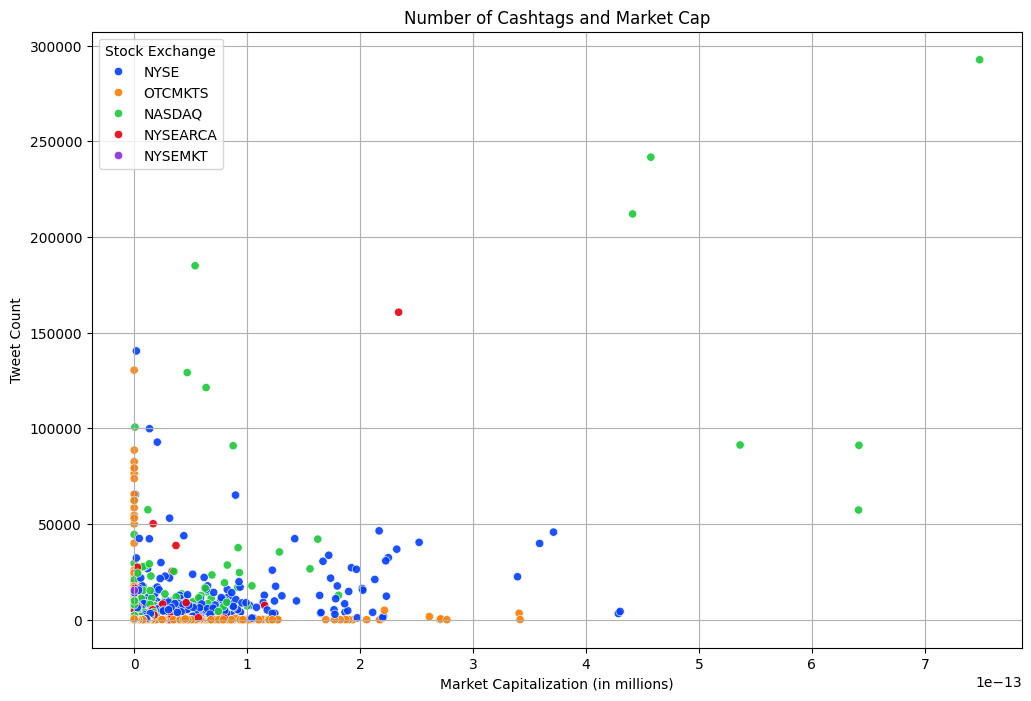

In [ ]:
# Convert capitalization to millions for better visualization
companies_df['capitalization'] = companies_df['capitalization'] / (10 ** 6)

# Adjusted scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(y='tweet_count', x='capitalization',
                hue='exchange', data=companies_df, palette='bright', alpha=0.9)

# Adjust the axis labels and plot title as needed
plt.ylabel('Tweet Count')
plt.xlabel('Market Capitalization (in millions)')
plt.title('Number of Cashtags and Market Cap')
plt.legend(title='Stock Exchange')
plt.grid(True)
plt.show()

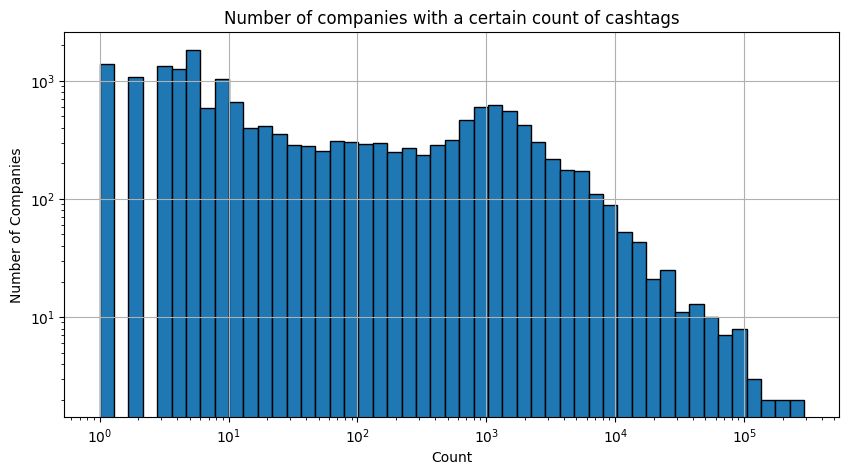

In [ ]:
# Assuming your dataset is named companies_df
tweet_counts = companies_df['tweet_count']  # Replace with your actual data

# Logarithmic binning
bin_edges = np.logspace(np.log10(1), np.log10(tweet_counts.max()), num=50)  # 50 logarithmically spaced bins

plt.figure(figsize=(10, 5))
plt.hist(tweet_counts, bins=bin_edges, edgecolor='black')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Number of companies with a certain count of cashtags')
plt.xlabel('Count')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.show()

<ipython-input-47-ed8220c3db47>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diff_from_avg_std', y='name', data=combined_df, palette='viridis', orient='h')


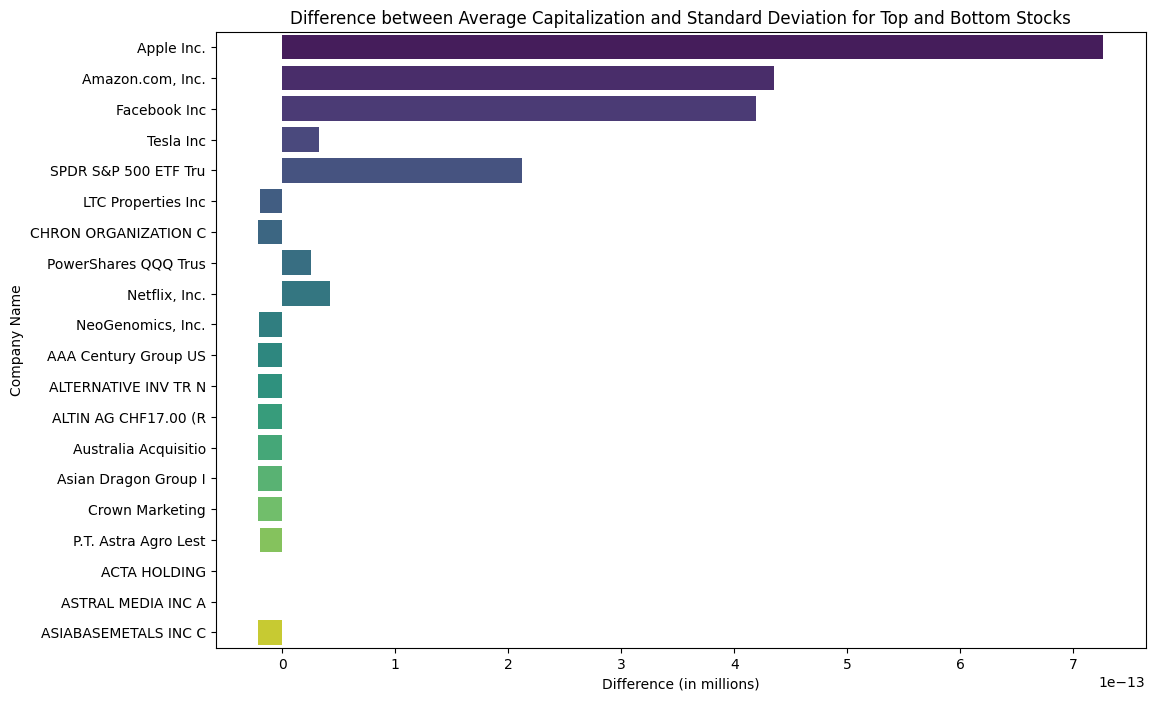

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is named companies_df
top_10 = companies_df.nlargest(10, 'tweet_count')
bottom_10 = companies_df.nsmallest(10, 'tweet_count')

# Calculate average capitalization and standard deviation for all stocks
average_cap = companies_df['capitalization'].mean()
std_deviation = companies_df['capitalization'].std()

# Calculate the difference between average and standard deviation for the top 10 and bottom 10 stocks
top_10['diff_from_avg_std'] = top_10['capitalization'] - average_cap - std_deviation
bottom_10['diff_from_avg_std'] = bottom_10['capitalization'] - average_cap - std_deviation

# Combine the top and bottom datasets for plotting
combined_df = pd.concat([top_10, bottom_10])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='diff_from_avg_std', y='name', data=combined_df, palette='viridis', orient='h')
plt.title('Difference between Average Capitalization and Standard Deviation for Top and Bottom Stocks')
plt.xlabel('Difference (in millions)')
plt.ylabel('Company Name')
plt.show()

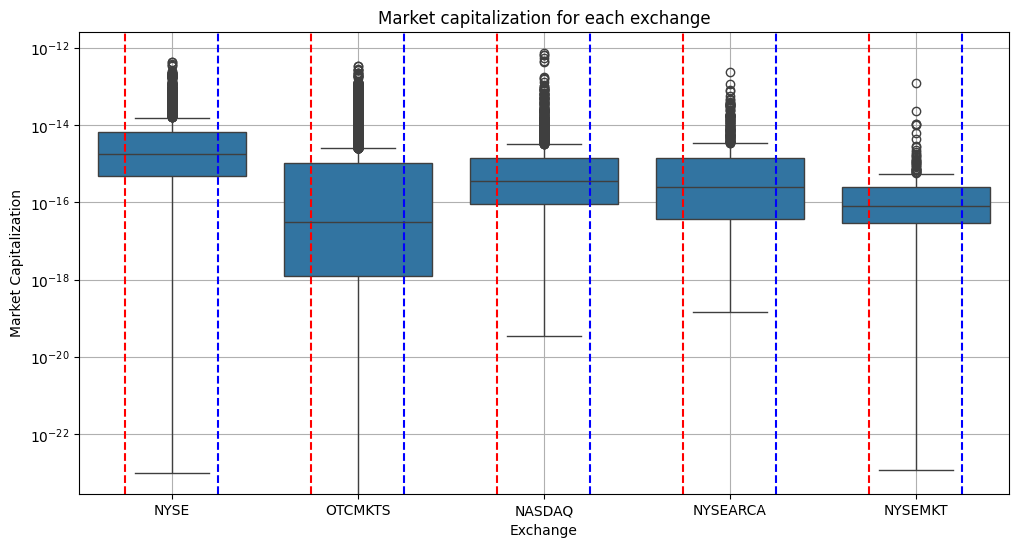

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is named companies_df
# Create a new DataFrame to store the biggest and smallest stock for each exchange
extremes_df = pd.DataFrame(columns=['exchange', 'company_name', 'capitalization'])

# Iterate through each exchange and find the biggest and smallest stock
for exchange in companies_df['exchange'].unique():
    exchange_stocks = companies_df[companies_df['exchange'] == exchange]
    biggest_stock = exchange_stocks.nlargest(1, 'capitalization')[['exchange', 'name', 'capitalization']]
    smallest_stock = exchange_stocks.nsmallest(1, 'capitalization')[['exchange', 'name', 'capitalization']]
    extremes_df = pd.concat([extremes_df, biggest_stock, smallest_stock])

# Creating the boxplot with a logarithmic scale
plt.figure(figsize=(12, 6))
sns.boxplot(x='exchange', y='capitalization', data=companies_df)
sns.scatterplot(x='exchange', y='capitalization', hue='company_name', data=extremes_df, s=150, marker='o', edgecolor='black', linewidth=1.5)
plt.yscale('log')  # Set the y-axis to a logarithmic scale

# Draw vertical lines to indicate the position of the biggest and smallest stocks for each exchange
for exchange in companies_df['exchange'].unique():
    x_position = companies_df['exchange'].unique().tolist().index(exchange)
    plt.axvline(x=x_position - 0.25, color='red', linestyle='--', linewidth=1.5)
    plt.axvline(x=x_position + 0.25, color='blue', linestyle='--', linewidth=1.5)

plt.title('Market capitalization for each exchange')
plt.xlabel('Exchange')
plt.ylabel('Market Capitalization')
plt.grid(True)
plt.show()

### Statistics of 5 individual stockes over time

In [ ]:
import random

# Define a function to get the biggest stock and a random stock from each exchange
def get_stocks_for_exchange(exchange):
    biggest_stock = companies_df[companies_df['exchange'] == exchange].nlargest(1, 'capitalization').iloc[0]
    random_stock = companies_df[companies_df['exchange'] == exchange].sample(1).iloc[0]
    return biggest_stock, random_stock

# Create a list to store the selected stocks
selected_stocks = []

# Select stocks for each exchange
for exchange in ['NASDAQ', 'NYSE', 'NYSEMKT', 'OTCMKTS', 'NYSEARCA']:
    biggest_stock, random_stock = get_stocks_for_exchange(exchange)
    selected_stocks.append(biggest_stock)
    selected_stocks.append(random_stock)

# Display the table
selected_stocks_df = pd.DataFrame(selected_stocks)[['exchange', 'name', 'ticker', 'capitalization', 'tweet_count']]
selected_stocks_df.reset_index(drop=True, inplace=True)
print(selected_stocks_df)


   exchange                  name ticker  capitalization  tweet_count
0    NASDAQ            Apple Inc.   AAPL    7.485500e-13     292631.0
1    NASDAQ  Natural Health Trend   NHTC    3.217000e-16        248.0
2      NYSE  Berkshire Hathaway I  BRK.B    4.302300e-13       4336.0
3      NYSE  Hannon Armstrong Sus   HASI    1.160000e-15       1063.0
4   NYSEMKT  British American Tob    BTI    1.239800e-13       2136.0
5   NYSEMKT  Tanzanian Royalty Ex    TRX    5.097000e-17        512.0
6   OTCMKTS  Tencent Holdings Ltd  TCTZF    3.416800e-13         76.0
7   OTCMKTS  SPIRAX-SARCO ENG UNS  SPXSY    3.410000e-15          1.0
8  NYSEARCA  SPDR S&P 500 ETF Tru    SPY    2.341300e-13     160688.0
9  NYSEARCA  Global X China Energ   CHIE    1.560000e-18         14.0


#### I chosed from each of the exchanges their biggest stock and also a random stock to analyze its change of number of tweets in comparison with average of number of tweets related to that exachange over from May 15, 2017, to September 15, 2017.

In [ ]:
# Convert 'created_at' column to datetime format
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])

In [ ]:
import seaborn as sns

# List of selected stocks
selected_stocks = ['AAPL', 'NHTC', 'BRK.B', 'HASI', 'BTI', 'TRX', 'TCTZF', 'SPXSY', 'SPY', 'CHIE']

# Extract date from 'created_at' for grouping
tweets_df['date'] = tweets_df['created_at'].dt.date

# Initialize a DataFrame to store the count of tweets per stock per date
tweet_counts = pd.DataFrame()

# Loop through each stock and calculate the number of tweets per date
for stock in selected_stocks:
    # Filter df_entities for the current stock's cashtag
    stock_entities = entities_df[entities_df['text'].str.contains(stock, na=False)]

    # Filter df_tweets for those that mention the current stock's cashtag
    stock_tweets = tweets_df[tweets_df['id'].isin(stock_entities['tweet_id'])]

    # Group by date and count the number of tweets
    stock_tweet_counts = stock_tweets.groupby('date').size().reset_index(name=f'{stock}_count')

    # If the tweet_counts DataFrame is empty, initialize it with the current stock's tweet counts
    if tweet_counts.empty:
        tweet_counts = stock_tweet_counts
    else:
        # Otherwise, merge the current stock's tweet counts with the existing tweet_counts DataFrame
        tweet_counts = tweet_counts.merge(stock_tweet_counts, on='date', how='outer')

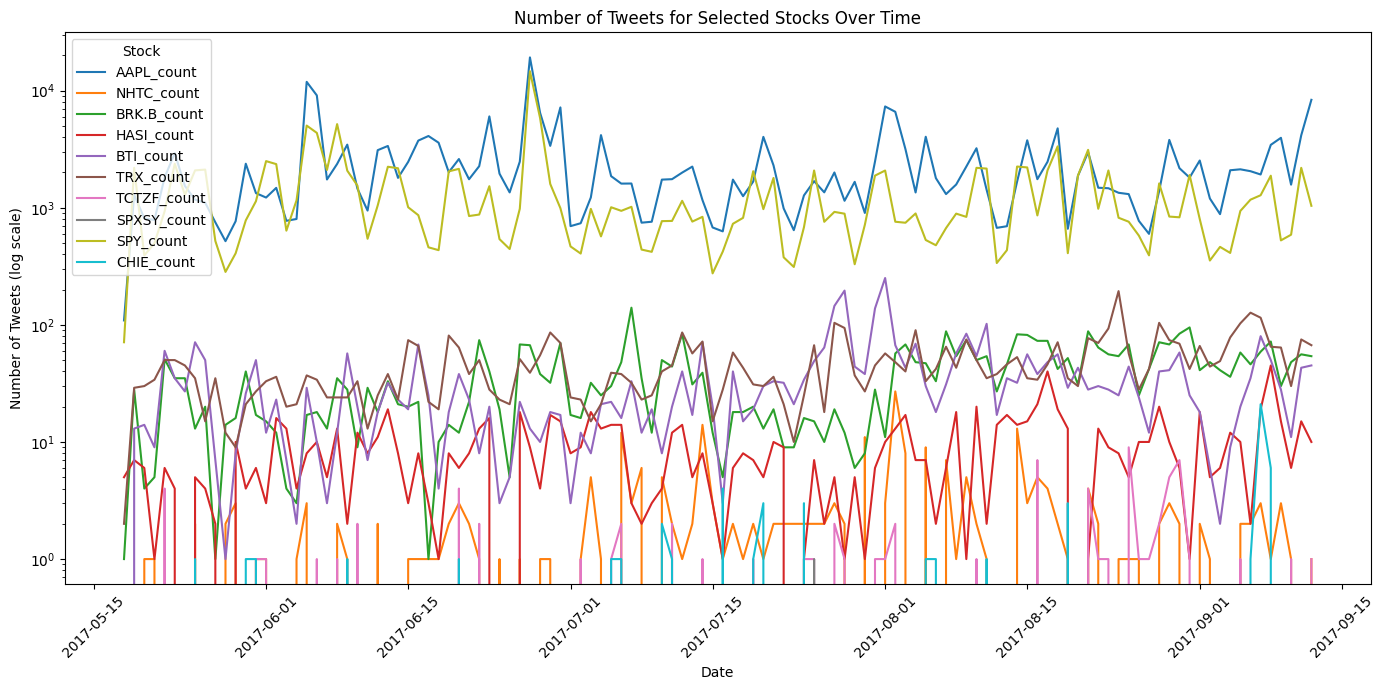

In [ ]:
# Replace NaN values with 0 to account for dates where there were no tweets for a stock
tweet_counts.fillna(0, inplace=True)

# Now we will melt the DataFrame to have a suitable format for sns.lineplot
tweet_counts_melted = tweet_counts.melt(id_vars=['date'], var_name='Stock', value_name='Tweet Count')

# Plotting the data with a logarithmic y-axis scale
plt.figure(figsize=(14, 7))
sns.lineplot(data=tweet_counts_melted, x='date', y='Tweet Count', hue='Stock')

plt.title('Number of Tweets for Selected Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets (log scale)')
plt.legend(title='Stock')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()

#### From above we can see that The data analyzed spans from May 15, 2017, to September 15, 2017. For each company, the daily number of tweets mentioning their stock ticker symbol was tracked. These counts were then plotted on a time series graph to visualize the distribution and volume of tweets over time.

#### This plot shows us that in addition to the stock itself, the exchange it comes from also has a big effect on the number of tweets it get and generally, stocks from NASDAQ have bigger market cap and get more tweets than the stocks from other exchanges.

#### The fact that the lines of the stocks selected randomly are closest to their biggest in the exchange also admits this hypothesis.


#### In the end, we can see that the data indicates that company-specific events, as well as sector-wide developments, can significantly influence public discussion on social media platforms such as Twitter. By analyzing tweet volumes over time, stakeholders can gain insights into public interest and sentiment, potentially aiding in decision-making processes related to marketing, investment, or public relations strategies.

### Distribution of all tweets over time

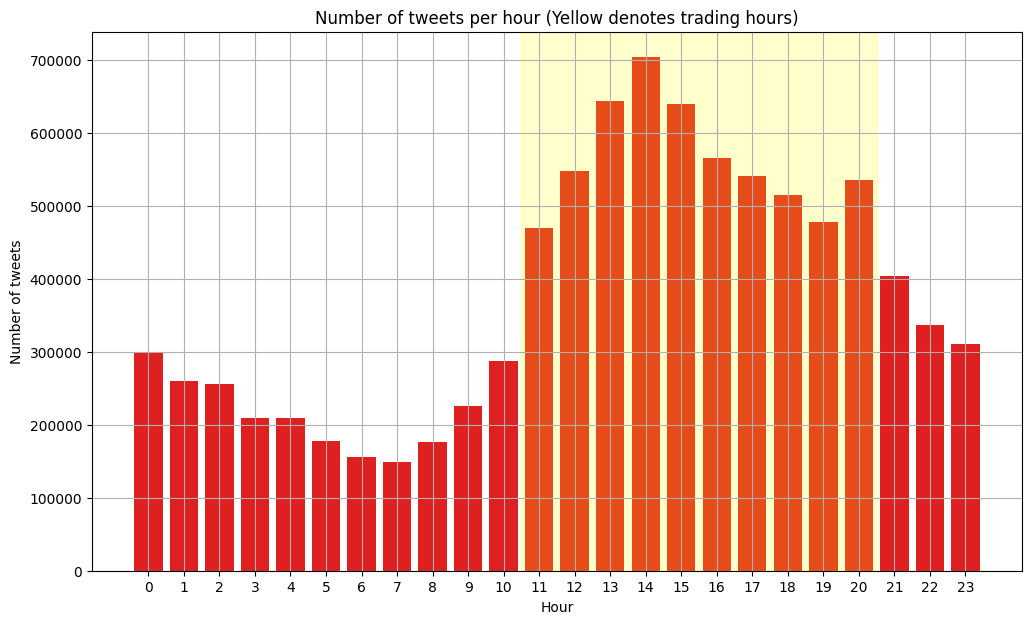

In [ ]:
# Extract the hour from the 'created_at' column
tweets_df['hour'] = pd.to_datetime(tweets_df['created_at']).dt.hour
tweet_counts_by_hour = tweets_df.groupby('hour').size().reset_index(name='tweet_count')

# Plot using Seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x='hour', y='tweet_count', data=tweet_counts_by_hour, color='red')

# Highlight trading hours (9:30 am to 4:00 pm EST)
plt.axvspan(10.5, 20.5, color='yellow', alpha=0.2)

plt.title('Number of tweets per hour (Yellow denotes trading hours)')
plt.xlabel('Hour')
plt.ylabel('Number of tweets')
plt.grid(True)
plt.show()


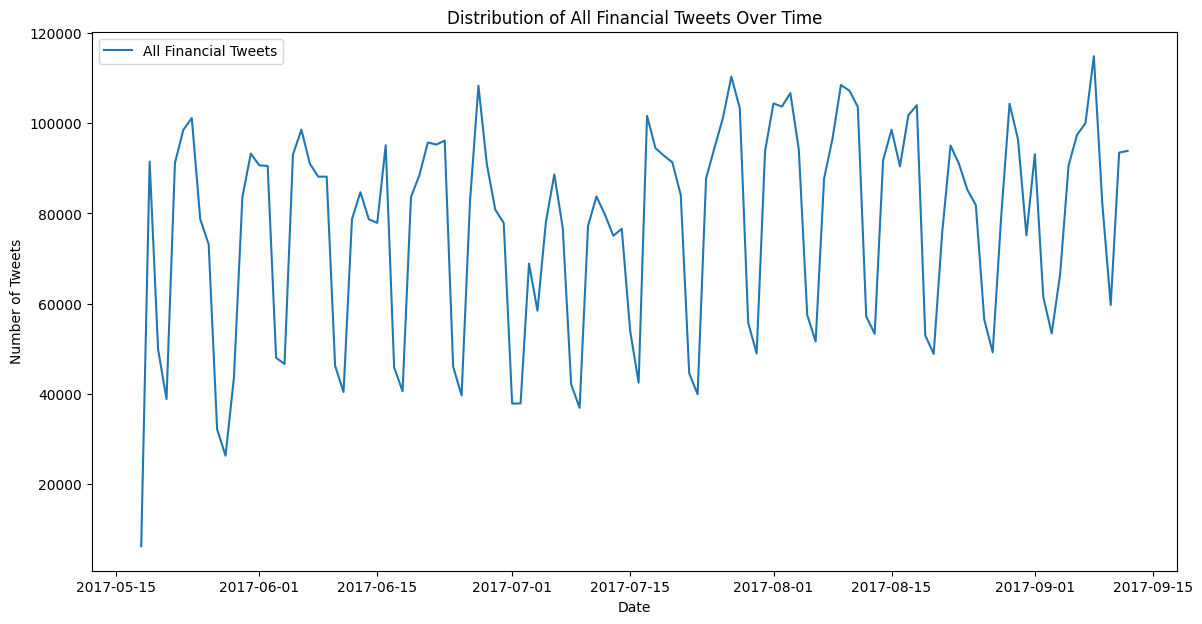

In [ ]:
# Group the tweets by date and count them
tweet_counts_by_date = tweets_df.groupby('date').size().reset_index(name='tweet_count')

# Now we'll plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=tweet_counts_by_date, x='date', y='tweet_count', label='All Financial Tweets')

plt.title('Distribution of All Financial Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

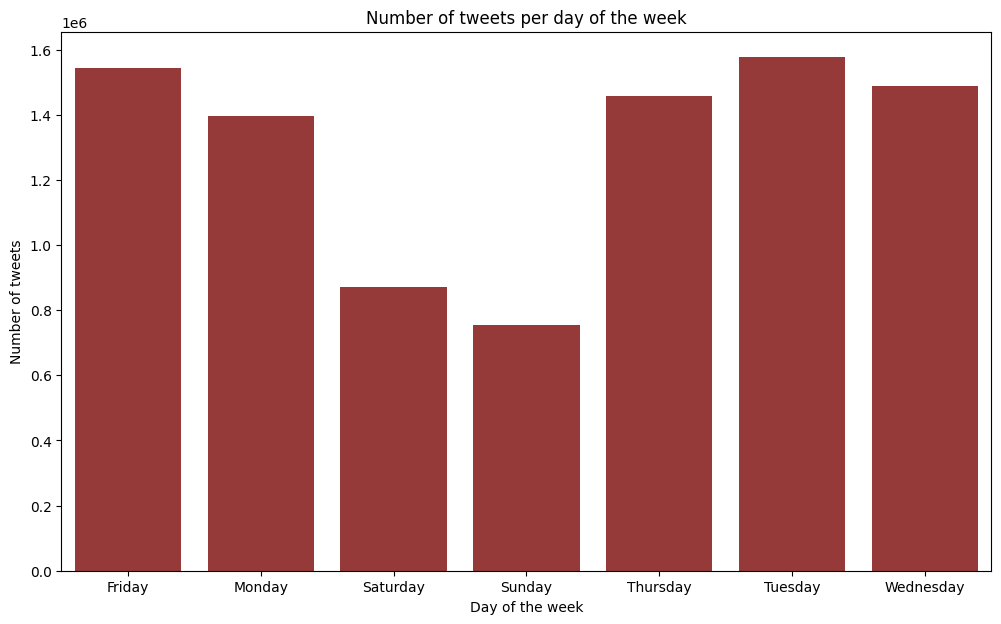

In [ ]:
# Extract the day from the 'created_at' column
tweets_df['day'] = pd.to_datetime(tweets_df['created_at']).dt.day_name()
tweet_counts_by_day = tweets_df.groupby('day').size().reset_index(name='tweet_count')

plt.figure(figsize=(12, 7))
sns.barplot(x='day', y='tweet_count', data=tweet_counts_by_day, color='brown')

plt.title('Number of tweets per day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of tweets')
plt.show()

#### Plot 1: Hourly Distribution of Tweets

- **Post Trading Hours**: Experiences a decline in tweet volume, suggesting reduced discussion outside typical market operation times.
- **Peak Activity**: Witnessed during late trading hours, indicating a correlation with market closing summaries and reactions to the day's financial events.
- **Tweet Activity**: Commences its ascent from midnight, showing a gradual increase. There's a notable surge from the 9th hour, coinciding with the commencement of standard trading hours.

#### Plot 2: Daily Distribution of Tweets

- **Week's End**: Fridays boast the highest volume of tweets, implying reactions to the week's financial events or anticipation of weekend news.
- **Midweek Activity**: Sees a notable increase on days like Tuesday and Wednesday, potentially associated with weekly financial announcements or regular market activity.
- **Weekend Quiet**: Saturdays exhibit the lowest volume of tweets, with activity picking up again during the weekdays.

#### Plot 3: Financial Tweets Over Time

- **Spikes**: These spikes may align with major financial events, market shocks, or economic data releases.
- **Fluctuations**: Witness significant ebb and flow in tweet volume throughout the observed period.
- **Cyclical Patterns**: Suggest a correlation with weekly market activity, with valleys potentially indicating weekends or non-trading days.



These analyses collectively offer insights into the temporal dynamics of financial discussions on Twitter. They can be valuable for financial analysts, traders, or social media strategists interested in understanding public sentiment, planning social media engagement, or identifying significant financial events reflected in social media activity.


### Distribution of retweets per tweets

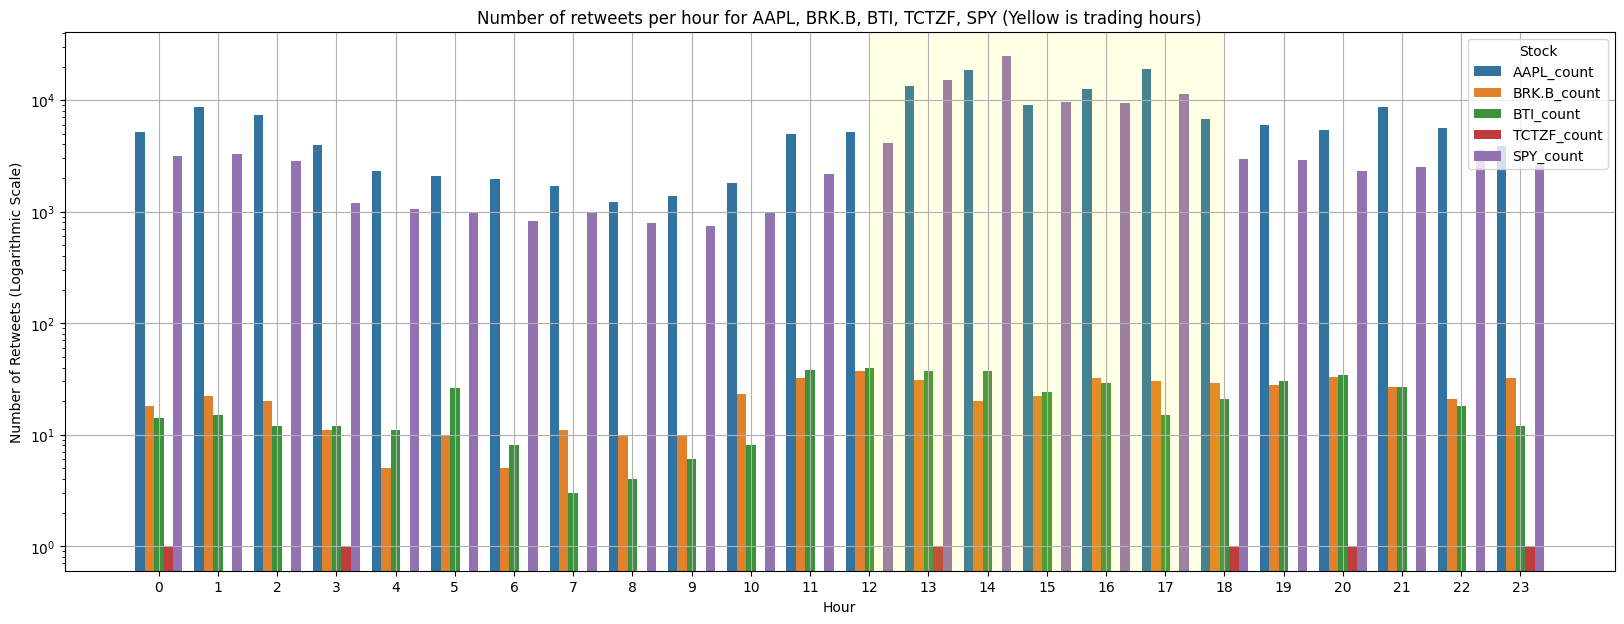

In [ ]:
# Stocks of interest
stocks = ['AAPL', 'BRK.B', 'BTI', 'TCTZF', 'SPY']

# Create a new DataFrame 'df_stock_tweets' to count retweets per hour for each stock
df_stock_tweets = pd.DataFrame()

# Loop through each stock
for stock in stocks:
    # Filter for tweets containing the stock's cashtag
    stock_entities = entities_df[entities_df['text'].str.contains(stock, na=False)]

    # Filter for retweets of those tweets
    stock_retweets = tweets_df[tweets_df['retweeted_status_id'].isin(stock_entities['tweet_id'])]

    # Count retweets per hour
    retweet_counts = stock_retweets.groupby('hour').size().reset_index(name=f'{stock}_count')

    # If this is the first stock, initialize df_stock_tweets
    if df_stock_tweets.empty:
        df_stock_tweets = retweet_counts
    else:
        # Merge the counts for this stock with the main DataFrame
        df_stock_tweets = df_stock_tweets.merge(retweet_counts, on='hour', how='outer')

# Fill any NaNs that resulted from the merge with 0
df_stock_tweets.fillna(0, inplace=True)

# Create a melted DataFrame for Seaborn
df_melted = df_stock_tweets.melt(id_vars='hour', var_name='Stock', value_name='Retweet Count')

# Plot using Seaborn with a logarithmic y-scale
plt.figure(figsize=(20, 7))
sns.barplot(x='hour', y='Retweet Count', hue='Stock', data=df_melted)

# Highlight trading hours (9:30 am to 4:00 pm EST)
plt.axvspan(12, 18, color='yellow', alpha=0.1)

plt.title('Number of retweets per hour for AAPL, BRK.B, BTI, TCTZF, SPY (Yellow is trading hours)')
plt.xlabel('Hour')
plt.ylabel('Number of Retweets (Logarithmic Scale)')
plt.legend(title='Stock')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

<ipython-input-76-e2962fa00c56>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Exchange', y='Total Tweet Count', data=exchange_tweet_df, palette='viridis')


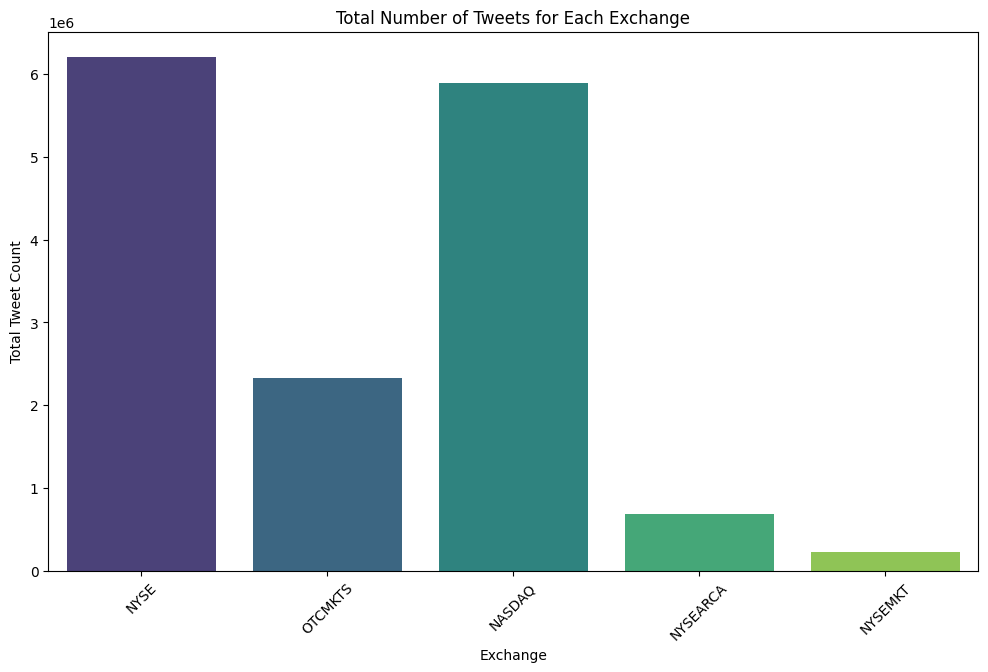

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a dictionary to store total tweet counts for each exchange
exchange_tweet_counts = {}

# Iterate over the companies dataset
for index, row in companies_df.iterrows():
    exchange = row['exchange']
    tweet_count = row['tweet_count']

    # Accumulate tweet counts for each exchange
    if exchange in exchange_tweet_counts:
        exchange_tweet_counts[exchange] += tweet_count
    else:
        exchange_tweet_counts[exchange] = tweet_count

# Convert the dictionary to a DataFrame for plotting
exchange_tweet_df = pd.DataFrame(list(exchange_tweet_counts.items()), columns=['Exchange', 'Total Tweet Count'])

# Plotting using Seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x='Exchange', y='Total Tweet Count', data=exchange_tweet_df, palette='viridis')

plt.title('Total Number of Tweets for Each Exchange')
plt.xlabel('Exchange')
plt.ylabel('Total Tweet Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Here we chosed the biggest stock of each of the exchanges to track thier number of retweets over hours. First it is obvious that the number of retweets changes similar to the hours of Wall-Streets trading hours, as they go higher in trading hours. Also, from the comparison of the number of retweets to the total number of tweets in each of the exchanges, it can be seen that the numbers and ratios between different stocks, match very well with their corresponding exchange. This shows that the biggest stocks of each exchange almost dominate all of the retweets of their exchanges. Also we can see that NASDAQ and NYSE have so much bigger number of retweets which is probably a sign of their much bigger Market Capitalization.

### Statistics on most important financial information on individual stocks most important financial information on individual stocks from financial information

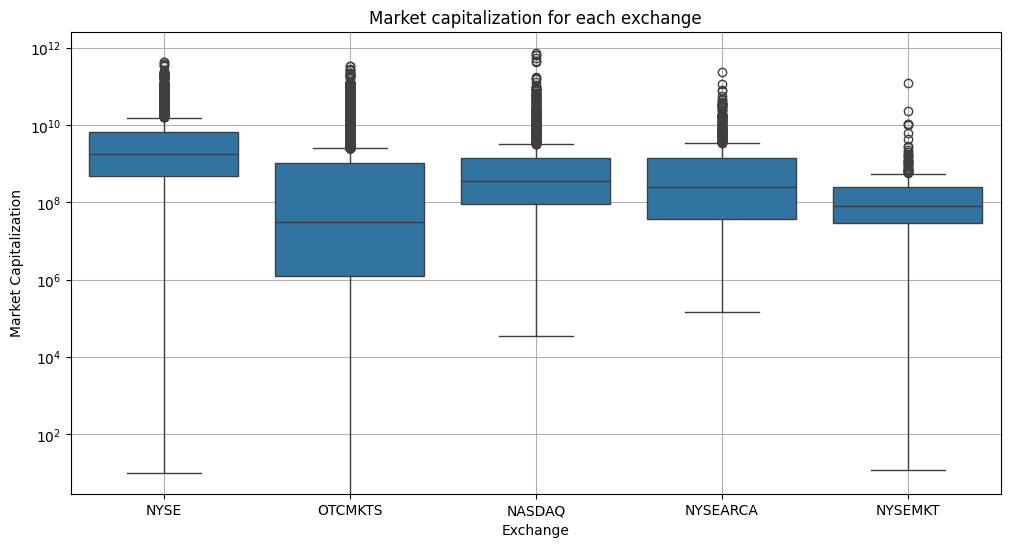

In [ ]:
# Creating the boxplot with a logarithmic scale
plt.figure(figsize=(12, 6))
sns.boxplot(x='exchange', y='capitalization', data=companies_df)
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Market capitalization for each exchange')
plt.xlabel('Exchange')
plt.ylabel('Market Capitalization')
plt.grid(True)
plt.show()

<ipython-input-92-b508b8808faa>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-92-b508b8808faa>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-92-b508b8808faa>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-92-b508b8808faa>:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




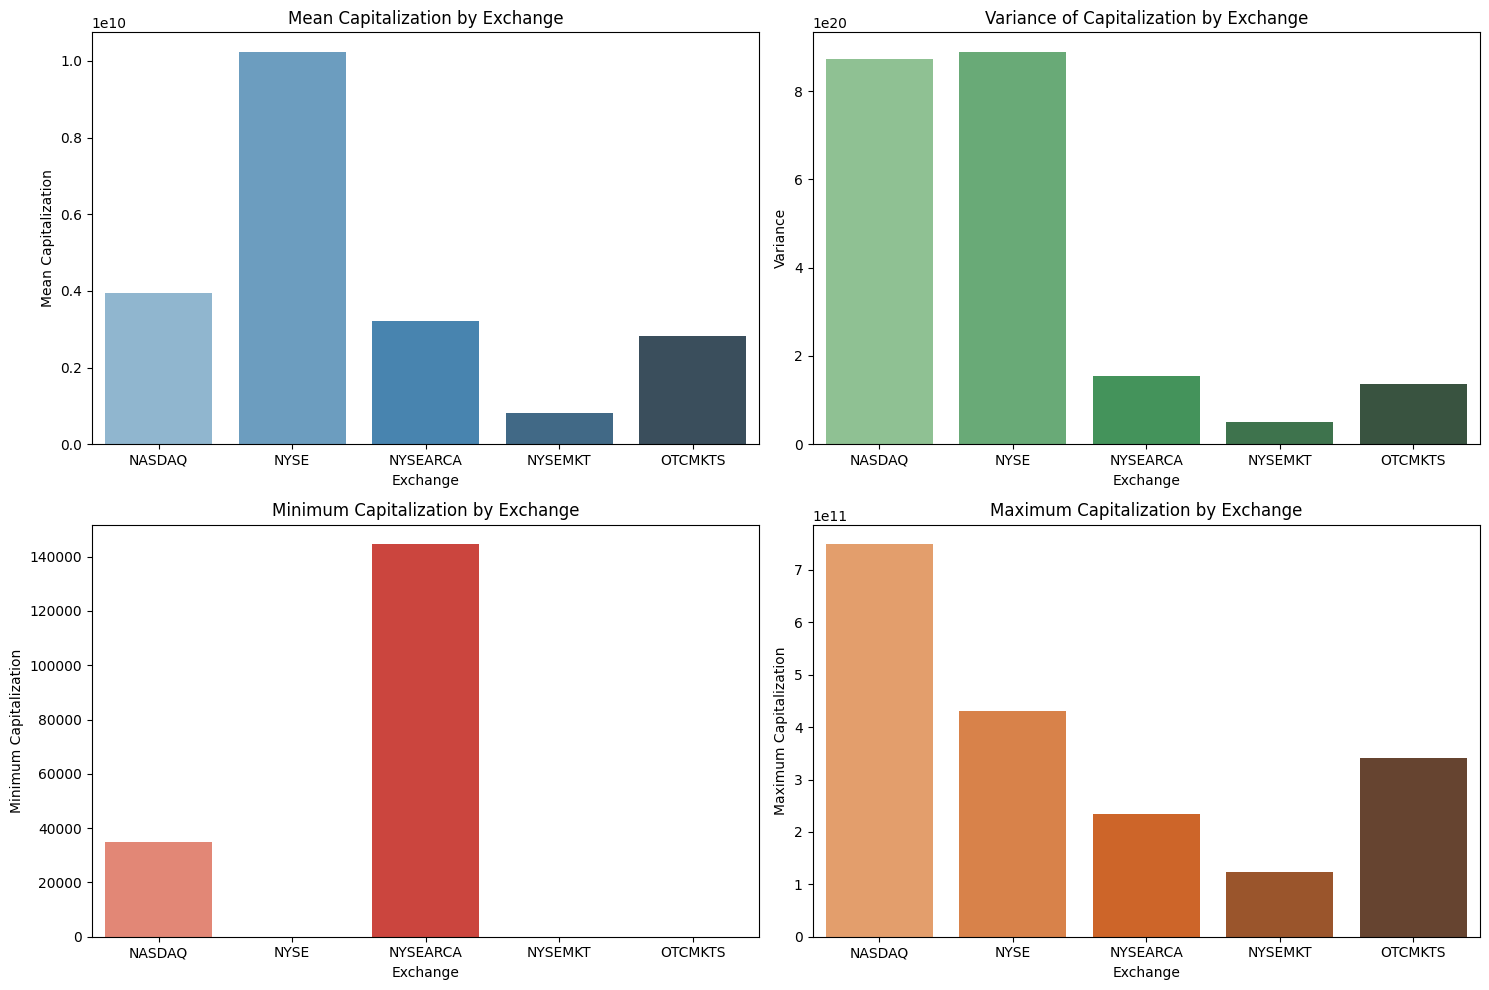

<ipython-input-92-b508b8808faa>:82: UserWarning:

Data has no positive values, and therefore cannot be log-scaled.



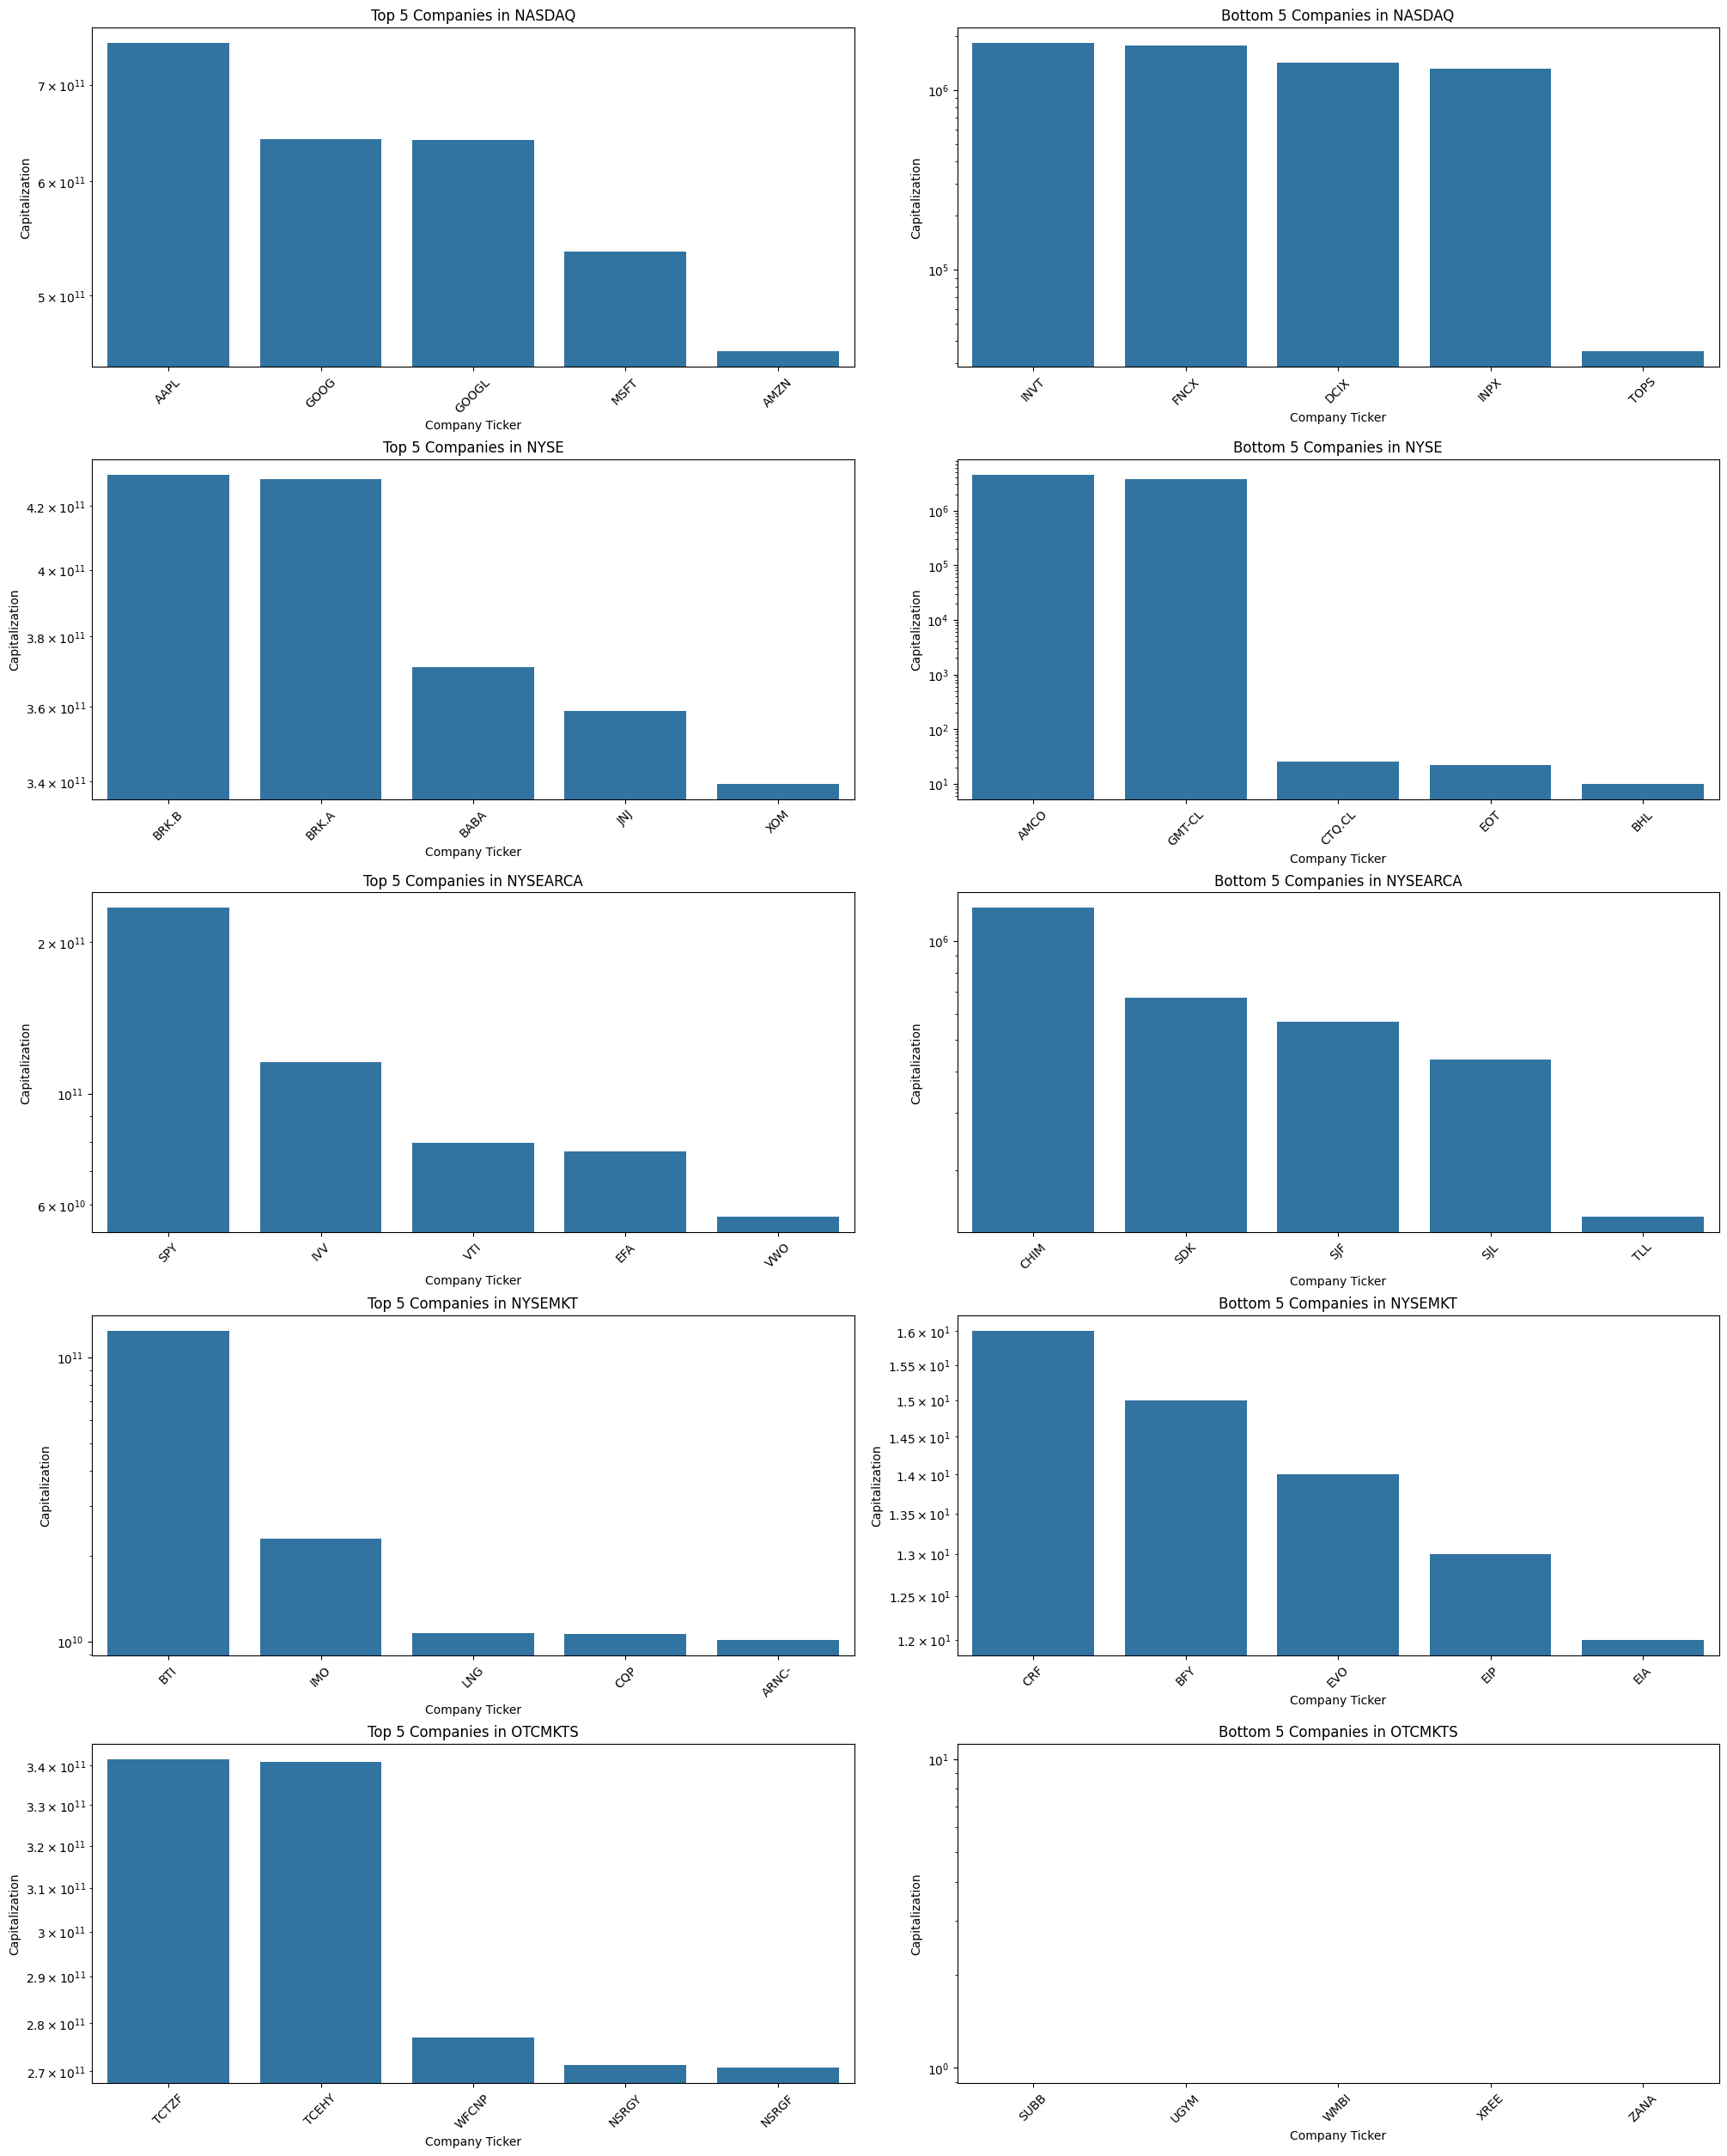

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'exchange' and calculate statistical parameters for 'capitalization'
exchange_stats = companies_df.groupby('exchange')['capitalization'].agg(['mean', 'var', 'min', 'max'])

# Reset index to convert the groupby result into a DataFrame
exchange_stats = exchange_stats.reset_index()

# Plotting statistical parameters for capitalization by exchange
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Mean capitalization by exchange
sns.barplot(ax=axes[0, 0], data=exchange_stats, x='exchange', y='mean', palette='Blues_d')
axes[0, 0].set_title('Mean Capitalization by Exchange')
axes[0, 0].set_xlabel('Exchange')
axes[0, 0].set_ylabel('Mean Capitalization')

# Variance of capitalization by exchange
sns.barplot(ax=axes[0, 1], data=exchange_stats, x='exchange', y='var', palette='Greens_d')
axes[0, 1].set_title('Variance of Capitalization by Exchange')
axes[0, 1].set_xlabel('Exchange')
axes[0, 1].set_ylabel('Variance')

# Minimum capitalization by exchange
sns.barplot(ax=axes[1, 0], data=exchange_stats, x='exchange', y='min', palette='Reds_d')
axes[1, 0].set_title('Minimum Capitalization by Exchange')
axes[1, 0].set_xlabel('Exchange')
axes[1, 0].set_ylabel('Minimum Capitalization')

# Maximum capitalization by exchange
sns.barplot(ax=axes[1, 1], data=exchange_stats, x='exchange', y='max', palette='Oranges_d')
axes[1, 1].set_title('Maximum Capitalization by Exchange')
axes[1, 1].set_xlabel('Exchange')
axes[1, 1].set_ylabel('Maximum Capitalization')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Sort companies within each exchange by capitalization and assign ranks
companies_df['rank'] = companies_df.groupby('exchange')['capitalization'].rank(method='max', ascending=False)
companies_df = companies_df.dropna(subset=['capitalization'])
companies_df = companies_df[companies_df['capitalization'] >= 0]
companies_df['capitalization'] = companies_df['capitalization'].astype(float)  # Ensure correct data type
companies_df_sorted = companies_df.sort_values(by=['exchange', 'capitalization'], ascending=[True, False])

# Assign ranks within each exchange based on sorted capitalization
companies_df_sorted['rank'] = companies_df_sorted.groupby('exchange')['capitalization'].rank(method='first', ascending=False)

# Create subplots for each exchange
exchanges = companies_df_sorted['exchange'].dropna().unique()
num_exchanges = len(exchanges)
fig, axs = plt.subplots(num_exchanges, 2, figsize=(20, num_exchanges * 5), constrained_layout=True)

# Loop through exchanges and plot top and bottom 5 companies
for i, exchange in enumerate(exchanges):
    # Filter the DataFrame for the current exchange
    df_exchange = companies_df_sorted[companies_df_sorted['exchange'] == exchange]
    df_exchange = df_exchange.dropna(subset=['capitalization'])
    df_exchange = df_exchange[df_exchange['capitalization'] >= 0]
    # Get the top 5 companies by capitalization within the exchange
    top_companies = df_exchange.head(5)
    # Get the bottom 5 companies by capitalization within the exchange
    bottom_companies = df_exchange.tail(5)
    # Plot for the top 5 companies
    sns.barplot(ax=axs[i, 0], data=top_companies, x='ticker', y='capitalization')
    axs[i, 0].set_title(f'Top 5 Companies in {exchange}')
    axs[i, 0].set_xlabel('Company Ticker')
    axs[i, 0].set_ylabel('Capitalization')
    axs[i, 0].tick_params(axis='x', rotation=45)
    axs[i, 0].set_yscale('log')  # Set y-axis scale to logarithmic

    # Plot for the bottom 5 companies
    sns.barplot(ax=axs[i, 1], data=bottom_companies, x='ticker', y='capitalization')
    axs[i, 1].set_title(f'Bottom 5 Companies in {exchange}')
    axs[i, 1].set_xlabel('Company Ticker')
    axs[i, 1].set_ylabel('Capitalization')
    axs[i, 1].tick_params(axis='x', rotation=45)
    axs[i, 1].set_yscale('log')  # Set y-axis scale to logarithmic

# Display the plots
plt.show()

#### This plots showcases visual analyses of financial metrics, particularly market capitalization, across different stock exchanges. It includes graphical representations such as boxplots and bar charts to illustrate market cap distributions, compare the top 5 stocks within each exchange, and highlight variability across exchanges. Observations from the visuals point out the diversity of market caps, the dominance of tech firms on exchanges like NASDAQ, and the variability within top exchanges like NYSE. These insights offer valuable perspectives for investors and analysts to understand market competitiveness and sector dynamics in various industries.

### Time-Series Movement of Apple and Tesla

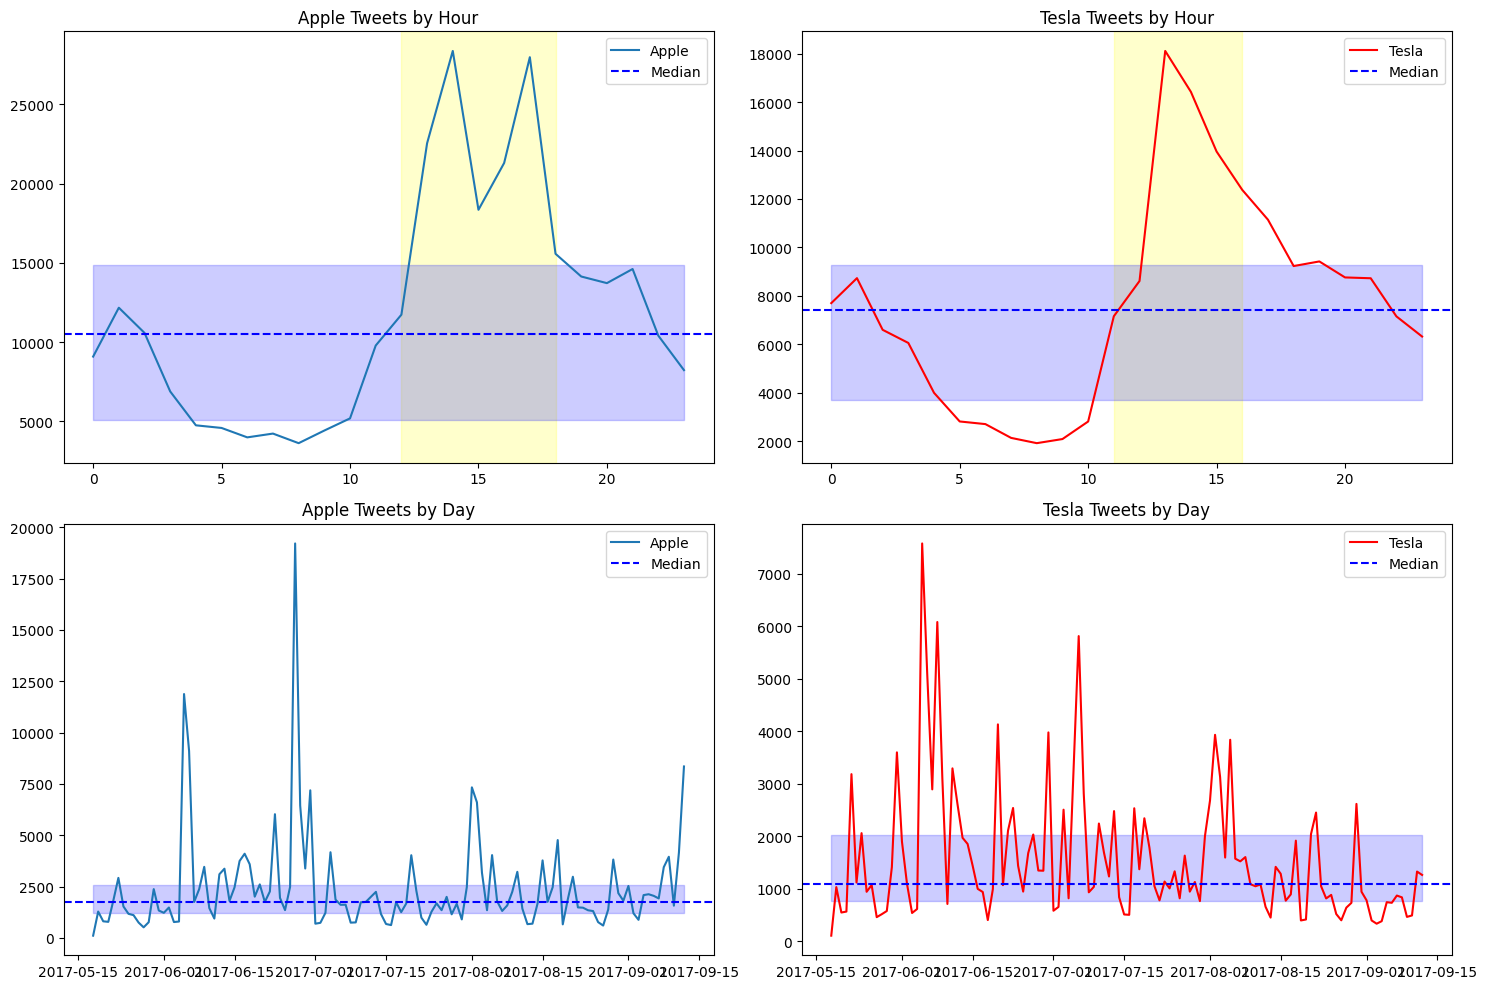

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])
# Extract date from 'created_at' for grouping
tweets_df['date'] = tweets_df['created_at'].dt.date

# Filter tweets for Apple and Tesla
apple_tweets = tweets_df[tweets_df['text'].str.contains('AAPL')]
tesla_tweets = tweets_df[tweets_df['text'].str.contains('TSLA')]

# Group and count tweets by date and hour
apple_tweets_count_by_hour = apple_tweets.groupby('hour').size()
tesla_tweets_count_by_hour = tesla_tweets.groupby('hour').size()

apple_tweets_count_by_day = apple_tweets.groupby('date').size()
tesla_tweets_count_by_day = tesla_tweets.groupby('date').size()

# Calculate median and quartiles for Apple tweets count by hour
apple_hourly_median = apple_tweets_count_by_hour.median()
apple_hourly_q1 = apple_tweets_count_by_hour.quantile(0.25)
apple_hourly_q3 = apple_tweets_count_by_hour.quantile(0.75)

# Calculate median and quartiles for Tesla tweets count by hour
tesla_hourly_median = tesla_tweets_count_by_hour.median()
tesla_hourly_q1 = tesla_tweets_count_by_hour.quantile(0.25)
tesla_hourly_q3 = tesla_tweets_count_by_hour.quantile(0.75)

# Calculate median and quartiles for Apple tweets count by day
apple_daily_median = apple_tweets_count_by_day.median()
apple_daily_q1 = apple_tweets_count_by_day.quantile(0.25)
apple_daily_q3 = apple_tweets_count_by_day.quantile(0.75)

# Calculate median and quartiles for Tesla tweets count by day
tesla_daily_median = tesla_tweets_count_by_day.median()
tesla_daily_q1 = tesla_tweets_count_by_day.quantile(0.25)
tesla_daily_q3 = tesla_tweets_count_by_day.quantile(0.75)

# Plotting with median and quartiles
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot the number of tweets by hour for a specific day with median and quartiles
axs[0, 0].plot(apple_tweets_count_by_hour.index, apple_tweets_count_by_hour.values, label='Apple')
axs[0, 0].axvspan(12, 18, color='yellow', alpha=0.2)
axs[0, 0].axhline(y=apple_hourly_median, color='blue', linestyle='--', label='Median')
axs[0, 0].fill_between(apple_tweets_count_by_hour.index, apple_hourly_q1, apple_hourly_q3, color='blue', alpha=0.2)
axs[0, 1].plot(tesla_tweets_count_by_hour.index, tesla_tweets_count_by_hour.values, label='Tesla', color='red')
axs[0, 1].axvspan(11, 16, color='yellow', alpha=0.2)
axs[0, 1].axhline(y=tesla_hourly_median, color='blue', linestyle='--', label='Median')
axs[0, 1].fill_between(tesla_tweets_count_by_hour.index, tesla_hourly_q1, tesla_hourly_q3, color='blue', alpha=0.2)


# Plot the number of tweets by day for the entire dataset with median and quartiles
axs[1, 0].plot(apple_tweets_count_by_day.index, apple_tweets_count_by_day.values, label='Apple')
axs[1, 0].axhline(y=apple_daily_median, color='blue', linestyle='--', label='Median')
axs[1, 0].fill_between(apple_tweets_count_by_day.index, apple_daily_q1, apple_daily_q3, color='blue', alpha=0.2)
axs[1, 1].plot(tesla_tweets_count_by_day.index, tesla_tweets_count_by_day.values, label='Tesla', color='red')
axs[1, 1].axhline(y=tesla_daily_median, color='blue', linestyle='--', label='Median')
axs[1, 1].fill_between(tesla_tweets_count_by_day.index, tesla_daily_q1, tesla_daily_q3, color='blue', alpha=0.2)

# Set titles, labels, etc.
axs[0, 0].set_title('Apple Tweets by Hour')
axs[0, 1].set_title('Tesla Tweets by Hour')
axs[1, 0].set_title('Apple Tweets by Day')
axs[1, 1].set_title('Tesla Tweets by Day')

# Show legend
for ax in axs.flat:
    ax.legend()

plt.tight_layout()
plt.show()

#### The visual analysis presented here delves into the tweet activity surrounding two prominent companies, Apple (AAPL) and Tesla (TSLA), focusing on both hourly and daily intervals. The hourly plots reveal fluctuations in tweet volume throughout the day, with heightened activity during presumed trading hours, suggesting a correlation between market movements and Twitter engagement. Meanwhile, the daily plots provide a broader perspective, highlighting spikes in tweet volume around significant events like product launches or quarterly earnings reports. By overlaying the dates of quarterly reports onto these daily plots, a more nuanced understanding of how financial events influence Twitter activity can be gained. While these visualizations offer valuable insights, further statistical analysis would be necessary to establish causal relationships between specific events and Twitter engagement levels.

### Co-occurrence of various stocks in the same tweets

In [ ]:
# Ensure that the 'text' column does not contain NaN values
entities_df.dropna(subset=['text'], inplace=True)

# Step 1: Filter tweets mentioning 'FB' and 'MSFT'
fb_tweets = entities_df[entities_df['text'].str.contains('FB')]
msft_tweets = entities_df[entities_df['text'].str.contains('MSFT')]

# Step 2: Merge the filtered entities with df_tweets to get the complete tweets
fb_tweets_full = fb_tweets.merge(tweets_df, left_on='tweet_id', right_on='id')
msft_tweets_full = msft_tweets.merge(tweets_df, left_on='tweet_id', right_on='id')

# Step 3: Count the number of tweets per day for both stocks
fb_daily_count = fb_tweets_full.groupby('date')['id'].count().reset_index(name='FB')
msft_daily_count = msft_tweets_full.groupby('date')['id'].count().reset_index(name='MSFT')

# Step 4: Merge the counts and calculate co-occurrence count for days when both stocks are mentioned
co_occurrence_daily = pd.merge(fb_daily_count, msft_daily_count, on='date', how='outer').fillna(0)

# Step 5: Analyze the correlation between the daily tweet counts for 'FB' and 'MSFT'
correlation = co_occurrence_daily[['FB', 'MSFT']].corr().iloc[0, 1]
print(f"The correlation between daily tweet counts for 'FB' and 'MSFT' is: {correlation}")

The correlation between daily tweet counts for 'FB' and 'MSFT' is: 0.5849818993425924


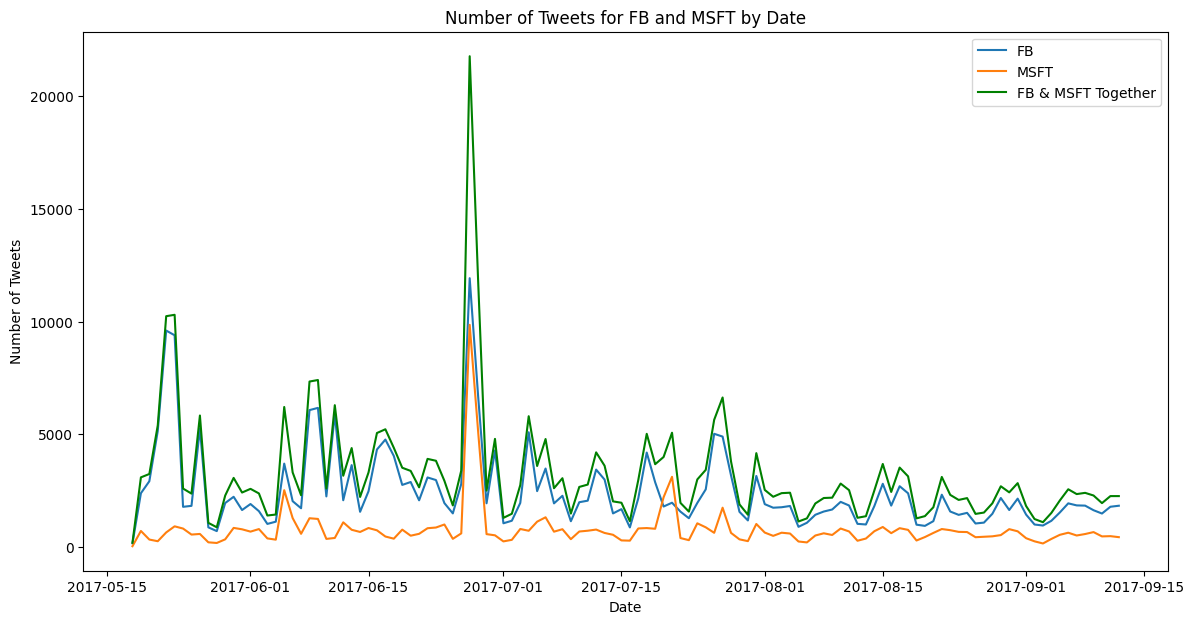

In [ ]:
# Step 6: Plot the daily tweet counts and co-occurrence
plt.figure(figsize=(14, 7))
plt.plot(co_occurrence_daily['date'], co_occurrence_daily['FB'], label='FB')
plt.plot(co_occurrence_daily['date'], co_occurrence_daily['MSFT'], label='MSFT')
plt.plot(co_occurrence_daily['date'], co_occurrence_daily['FB'] + co_occurrence_daily['MSFT'],
         label='FB & MSFT Together', color='green')
plt.legend()
plt.title('Number of Tweets for FB and MSFT by Date')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

## 2. Sentiment Analysis-1

### Prerequisties

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import torch
from tqdm import tqdm
from joblib import dump
from huggingface_hub import notebook_login
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW, get_linear_schedule_with_warmup
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Cleaning Data

In [ ]:
# Name the columns in the training DataFrame
training_df.columns = ['label', 'tweet_id', 'date', 'query', 'user_id', 'text']

# Convert label values: If label is 0, it remains 0; otherwise, set it to 1.
training_df['label'] = training_df['label'].apply(lambda x: 0 if x == 0 else 1)

# Convert the 'date' column to datetime format for proper date handling.
training_df['date'] = pd.to_datetime(training_df['date'])

# Display information about the DataFrame, including data types and non-null counts.
training_df.info()

# Drop the 'query' column as it is no longer needed in the DataFrame.
training_df.drop(['query'], axis=1, inplace=True)

# Remove duplicate rows based on the 'tweet_id' column to ensure data integrity.
training_df.drop_duplicates(subset=['tweet_id'], inplace=True)

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   label     1599999 non-null  int64         
 1   tweet_id  1599999 non-null  int64         
 2   date      1599999 non-null  datetime64[ns]
 3   query     1599999 non-null  object        
 4   user_id   1599999 non-null  object        
 5   text      1599999 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 73.2+ MB


### Now before procedding to the next parts of Text-Training, we sample from our dataset since it is very large

In [ ]:
sampled_df = training_df.sample(n=100000, random_state=42)

### Cleaning the Texts

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download the stopwords corpus
nltk.download('stopwords')

# Define a function to clean text
def clean_text(input_text):
    # Convert text to lowercase
    lowercase_text = input_text.lower()
    # Remove special characters (keep letters and digits)
    alphanumeric_text = re.sub(r'[^a-zA-Z0-9\s]', '', lowercase_text)
    # Truncate three or more consecutive lowercase letters to two
    normalized_text = re.sub(r'([a-z])\1{2,}', r'\1\1', alphanumeric_text)
    # Tokenize text
    tokens = word_tokenize(normalized_text)
    # Remove stopwords (optional, based on your need)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Initialize stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    # Apply stemming and lemmatization (you might choose one based on your need)
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back to form the cleaned text
    cleaned_text = ' '.join(lemmatized_tokens)  # or use stemmed_tokens if preferred
    return cleaned_text

# Apply the clean_text function to the 'text' column in the sampled DataFrame
sampled_df['text'] = sampled_df['text'].apply(clean_text)

# Display the first few rows of the cleaned DataFrame
sampled_df.head()

sampled_df.to_csv('./sampled_data.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd

# Load the CSV file from your local machine into a DataFrame
sampled_df = pd.read_csv('./sampled_data.csv')

### BOW, TF-IDF, SPACY, BERT & ROBERTA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Fill missing values in 'text' column with an empty string
sampled_df['text'] = sampled_df['text'].fillna("")

# Splitting data into train, eval, and test sets
X = sampled_df['text']  # Features
y = sampled_df['label']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the test set into evaluation and final test sets
X_eval, X_test, y_eval, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


#### BOW

In [ ]:
# Create a pipeline that first creates bag of words features, then trains a logistic regression model
bow_pipeline = make_pipeline(
    CountVectorizer(),
    LogisticRegression(max_iter=1000)
)

bow_pipeline.fit(X_train.values, y_train.values)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
# Predictions on the training, evaluation, and test sets using the Bag-of-Words (BoW) pipeline
y_train_pred = bow_pipeline.predict(X_train.values)
y_eval_pred = bow_pipeline.predict(X_eval.values)
y_test_pred = bow_pipeline.predict(X_test.values)

# Accuracy calculation
train_accuracy = accuracy_score(y_train, y_train_pred)
eval_accuracy = accuracy_score(y_eval, y_eval_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy for each set
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Validation Accuracy: {eval_accuracy}")

# Classification Report for each set
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

print("\nClassification Report for Evaluation Set:")
print(classification_report(y_eval, y_eval_pred))


Training Accuracy: 0.8573308901334297
Testing Accuracy: 0.8020546573902597
Validation Accuracy: 0.8009022029518679

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86    640719
           1       0.85      0.86      0.86    637932

    accuracy                           0.86   1278651
   macro avg       0.86      0.86      0.86   1278651
weighted avg       0.86      0.86      0.86   1278651


Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     79815
           1       0.80      0.81      0.80     80017

    accuracy                           0.80    159832
   macro avg       0.80      0.80      0.80    159832
weighted avg       0.80      0.80      0.80    159832


Classification Report for Evaluation Set:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     7946

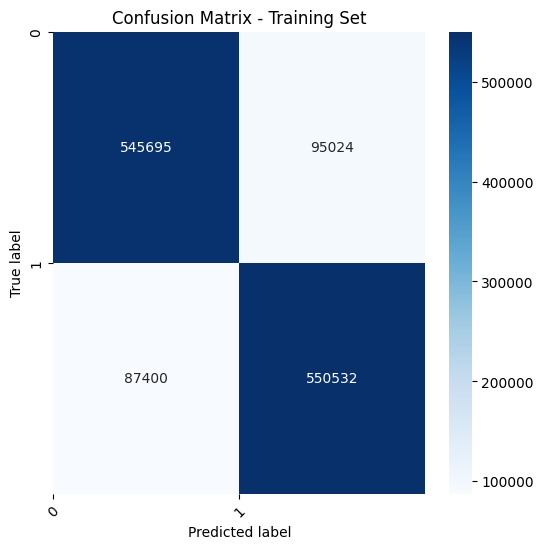

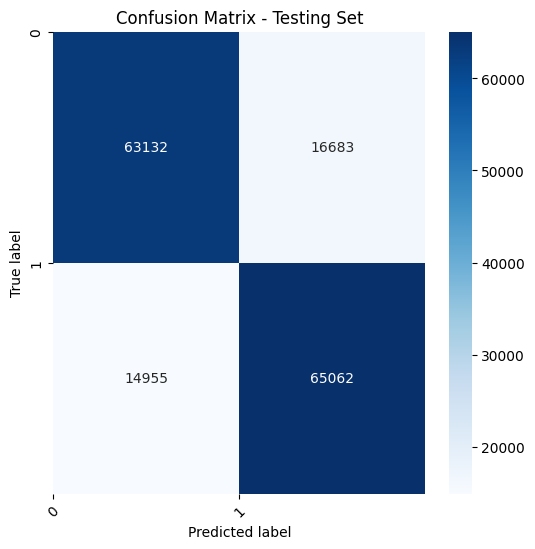

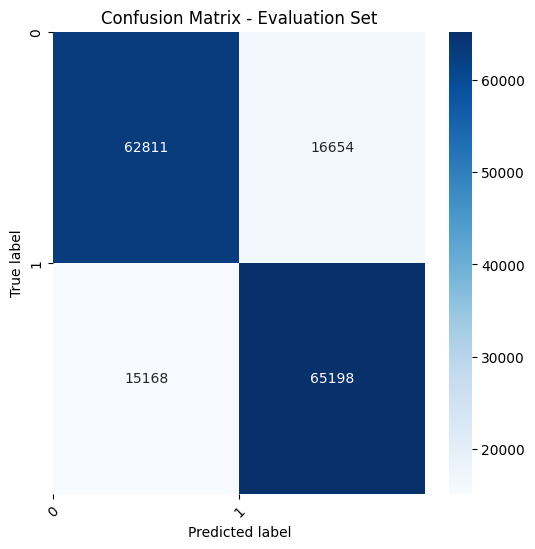

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ploting confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(np.arange(len(classes)), classes, rotation=45)
    plt.yticks(np.arange(len(classes)), classes)
    plt.show()

# Confusion matrices for the training, evaluation, and test sets
cm_train = confusion_matrix(y_train.values, y_train_pred)
cm_eval = confusion_matrix(y_eval.values, y_eval_pred)
cm_test = confusion_matrix(y_test.values, y_test_pred)

# Plot confusion matrices for each set
plot_confusion_matrix(cm_train, classes=bow_pipeline.classes_, title='Confusion Matrix - Training Set')
plot_confusion_matrix(cm_test, classes=bow_pipeline.classes_, title='Confusion Matrix - Testing Set')
plot_confusion_matrix(cm_eval, classes=bow_pipeline.classes_, title='Confusion Matrix - Evaluation Set')


In [ ]:
# Saving the Model
dump(bow_pipeline, "bow_model.joblib")

['bow_model.joblib']

### TF-IDF

In [ ]:
# Create a pipeline that first creates TF-IDF features, then trains a logistic regression model
tfidf_pipeline = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression(max_iter=1000)
)

# Train the model
tfidf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

Training Accuracy: 0.8304549091190637
Testing Accuracy: 0.8041756344161369
Evaluation Accuracy: 0.8037364466217443

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83    640719
           1       0.82      0.84      0.83    637932

    accuracy                           0.83   1278651
   macro avg       0.83      0.83      0.83   1278651
weighted avg       0.83      0.83      0.83   1278651


Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     79815
           1       0.80      0.81      0.81     80017

    accuracy                           0.80    159832
   macro avg       0.80      0.80      0.80    159832
weighted avg       0.80      0.80      0.80    159832


Classification Report for Evaluation Set:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80     7946

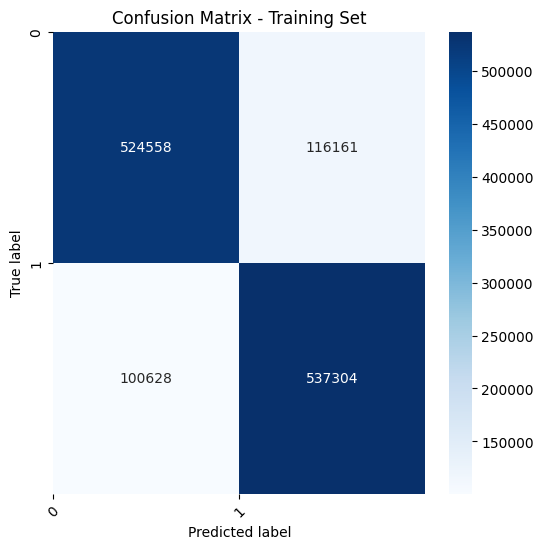

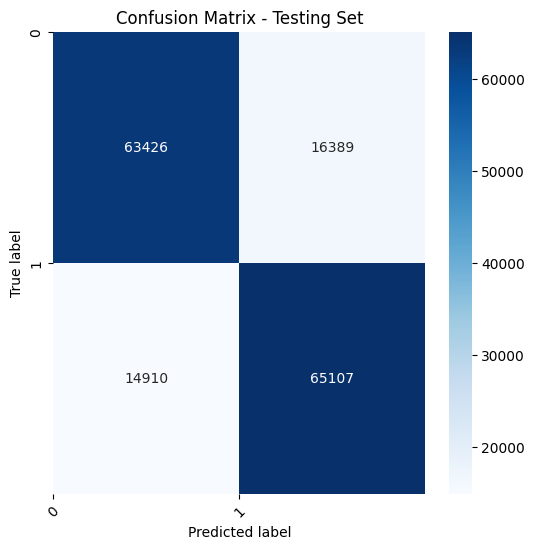

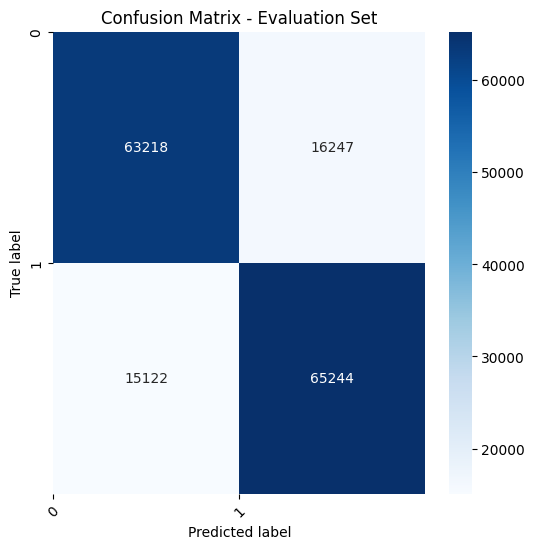

In [ ]:
# Predictions on the training, testing, and evaluation sets using the TF-IDF pipeline
y_train_pred_tfidf = tfidf_pipeline.predict(X_train)
y_test_pred_tfidf = tfidf_pipeline.predict(X_test)
y_eval_pred_tfidf = tfidf_pipeline.predict(X_eval)

# Accuracy calculation
train_accuracy_tfidf = accuracy_score(y_train, y_train_pred_tfidf)
test_accuracy_tfidf = accuracy_score(y_test, y_test_pred_tfidf)
eval_accuracy_tfidf = accuracy_score(y_eval, y_eval_pred_tfidf)

# Print the accuracy for each set
print(f"Training Accuracy: {train_accuracy_tfidf}")
print(f"Testing Accuracy: {test_accuracy_tfidf}")
print(f"Evaluation Accuracy: {eval_accuracy_tfidf}")

# Classification Report for each set
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_train_pred_tfidf))

print("\nClassification Report for Testing Set:")
print(classification_report(y_test, y_test_pred_tfidf))

print("\nClassification Report for Evaluation Set:")
print(classification_report(y_eval, y_eval_pred_tfidf))

# Confusion Matrices
cm_train_tfidf = confusion_matrix(y_train, y_train_pred_tfidf)
cm_test_tfidf = confusion_matrix(y_test, y_test_pred_tfidf)
cm_eval_tfidf = confusion_matrix(y_eval, y_eval_pred_tfidf)

# Plot confusion matrices for each set
plot_confusion_matrix(cm_train_tfidf, classes=tfidf_pipeline.classes_, title='Confusion Matrix - Training Set')
plot_confusion_matrix(cm_test_tfidf, classes=tfidf_pipeline.classes_, title='Confusion Matrix - Testing Set')
plot_confusion_matrix(cm_eval_tfidf, classes=tfidf_pipeline.classes_, title='Confusion Matrix - Evaluation Set')

In [ ]:
# Saving the Model
dump(tfidf_pipeline, "tfidf_model.joblib")

['tfidf_model.joblib']

### SPACY

In [ ]:
import spacy
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load SpaCy English tokenizer
nlp = spacy.load("en_core_web_sm")

# Tokenize text
def tokenize_texts(texts):
    tokenized_texts = []
    for text in texts:
        tokenized_text = [token.text for token in nlp(text)]
        tokenized_texts.append(tokenized_text)
    return tokenized_texts

# Prepare datasets
def create_dataset(X, y):
    tokenized_texts = tokenize_texts(X.tolist())
    labels = torch.tensor(y.tolist())
    return TensorDataset(tokenized_texts, labels)

train_dataset = create_dataset(X_train, y_train)
test_dataset = create_dataset(X_test, y_test)
eval_dataset = create_dataset(X_eval, y_eval)

# Create DataLoaders
batch_size = 16
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)
eval_dataloader = DataLoader(eval_dataset, shuffle=False, batch_size=batch_size)

# Initialize SpaCy model for text classification
spacy_model = spacy.blank("en")
textcat = spacy_model.create_pipe("textcat")
textcat.add_label("POSITIVE")  # Example label
spacy_model.add_pipe(textcat)

# Train the SpaCy model
nlp.begin_training()
for epoch in range(10):
    losses = {}
    for batch in train_dataloader:
        texts, labels = batch
        nlp.update(texts, labels, losses=losses)
    print(losses)

# Evaluate the SpaCy model
with torch.no_grad():
    for batch in eval_dataloader:
        texts, labels = batch
        predictions = [textcat(text)[0].argmax().item() for text in texts]
        accuracy = torch.sum(torch.tensor(predictions) == labels) / len(labels)
        print("Accuracy:", accuracy.item())

In [ ]:
import torch
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm

# Prepare optimizer and schedule (linear warm-up and decay)
optimizer = torch.optim.AdamW(spacy_model.parameters(), lr=2e-5, eps=1e-8)
epochs = 3
total_steps = len(train_dataloader) * epochs

# Function to calculate the accuracy of predictions vs labels
def calculate_accuracy(predictions, true_labels):
    predicted_flat = np.argmax(predictions, axis=1).flatten()
    true_labels_flat = true_labels.flatten()
    return np.sum(predicted_flat == true_labels_flat) / len(true_labels_flat)

# Set SpaCy model to training mode
spacy_model.begin_training()

# Training loop
for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    total_loss = 0
    train_accuracy, train_steps = 0, 0

    # tqdm for progress bar
    progress_bar = tqdm(enumerate(train_dataloader), total=len(train_dataloader))

    for step, batch in progress_bar:
        # Move input data to the appropriate device (GPU or CPU)
        texts, labels = batch
        labels = labels.numpy()

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        losses = {}
        output = spacy_model.update(texts, labels, losses=losses)

        # Calculate accuracy
        logits = output.argmax(axis=1)
        tmp_train_accuracy = calculate_accuracy(logits, labels)
        train_accuracy += tmp_train_accuracy
        train_steps += 1

        # Calculate loss
        loss = sum(losses.values())
        total_loss += loss.item()

        # Backpropagation
        loss.backward()

        # Update parameters
        optimizer.step()

        # Update progress bar description
        progress_bar.set_description(f"Epoch {epoch_i + 1} Step {step + 1}/{len(train_dataloader)} Loss: {loss.item():.4f}")

    # Calculate and print average training loss and accuracy
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average training loss: {0:.2f}".format(avg_train_loss))
    print("Training accuracy: {0:.2f}".format(train_accuracy / train_steps))

In [ ]:
# Set SpaCy model to evaluation mode
spacy_model.end_training()

# Function to calculate the accuracy of predictions vs labels
def calculate_accuracy(predictions, labels):
    predicted_classes = np.argmax(predictions, axis=1).flatten()
    true_labels_flat = labels.flatten()
    return np.sum(predicted_classes == true_labels_flat) / len(true_labels_flat)

# Initialize evaluation variables
evaluation_accuracy = 0
num_eval_steps = 0

# Evaluate on the evaluation dataloader
for batch in eval_dataloader:
    texts, labels = batch
    labels = labels.numpy()

    # Perform forward pass without backpropagation
    with spacy_model.select_pipes(enable=["textcat"]):
        docs = [spacy_model(text) for text in texts]
        scores = np.array([doc.cats['LABEL'] for doc in docs])
        logits = np.vstack([1 - scores, scores]).T  # Convert to logits format
        tmp_eval_accuracy = calculate_accuracy(logits, labels)
        evaluation_accuracy += tmp_eval_accuracy
        num_eval_steps += 1

# Calculate and print the evaluation accuracy
average_eval_accuracy = evaluation_accuracy / num_eval_steps
print("Evaluation accuracy: {0:.2f}".format(average_eval_accuracy))

In [ ]:
# Set SpaCy model to evaluation mode
spacy_model.end_training()

# Initialize variables for test evaluation
test_accuracy = 0
num_test_steps = 0

# Loop through the test data loader
for batch in test_dataloader:
    texts, labels = batch
    labels = labels.numpy()

    # Perform forward pass without backpropagation
    with spacy_model.select_pipes(enable=["textcat"]):
        docs = [spacy_model(text) for text in texts]
        scores = np.array([doc.cats['LABEL'] for doc in docs])
        logits = np.vstack([1 - scores, scores]).T  # Convert to logits format

    # Calculate accuracy for the batch
    tmp_test_accuracy = calculate_accuracy(logits, labels)
    test_accuracy += tmp_test_accuracy
    num_test_steps += 1

# Print the test accuracy
print("Test accuracy: {0:.2f}".format(test_accuracy / num_test_steps))

In [ ]:
# Save the trained model
spacy_model.to_disk("./spacy_model")

# Import necessary libraries
import os
import shutil

def zip_folder(folder_path, output_zip_file):
    # Create a ZipFile object in write mode
    with zipfile.ZipFile(output_zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory and add each file to the zip archive
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, os.path.dirname(folder_path))
                zipf.write(file_path, arcname=arcname)

# Specify the folder path and output zip file path
folder_path = '/content/spacy_model'
output_zip_file = '/content/spacy_model.zip'

# Call the zip_folder function to create the zip file
shutil.make_archive(output_zip_file, 'zip', folder_path)

### BERT

In [ ]:
# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize text
def tokenize_texts(texts):
    return tokenizer.batch_encode_plus(
        texts,
        max_length = 128,  # Max length for BERT
        padding = 'max_length',
        truncation = True,
        return_tensors = 'pt'  # PyTorch tensors
    )

# Prepare datasets
def create_dataset(X, y):
    inputs = tokenize_texts(X.tolist())
    labels = torch.tensor(y.tolist())
    dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
    return dataset

train_dataset = create_dataset(X_train, y_train)
test_dataset = create_dataset(X_test, y_test)
eval_dataset = create_dataset(X_eval, y_eval)

# Create DataLoaders
batch_size = 16
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)
eval_dataloader = DataLoader(eval_dataset, sampler=SequentialSampler(eval_dataset), batch_size=batch_size)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(y_train)))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Prepare optimizer and schedule (linear warm-up and decay)
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
epochs = 3
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)

# Function to calculate the accuracy of predictions vs labels
def calculate_accuracy(predictions, true_labels):
    predicted_flat = np.argmax(predictions, axis=1).flatten()
    true_labels_flat = true_labels.flatten()
    return np.sum(predicted_flat == true_labels_flat) / len(true_labels_flat)

# Set model to training mode
model.train()

# Training loop
for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    total_loss = 0
    train_accuracy, train_steps = 0, 0

    # tqdm for progress bar
    progress_bar = tqdm(enumerate(train_dataloader), total=len(train_dataloader))

    for step, batch in progress_bar:
        # Move input data to the appropriate device (GPU or CPU)
        input_ids, input_mask, labels = tuple(t.to(device) for t in batch)

        # Zero gradients
        model.zero_grad()

        # Forward pass
        outputs = model(input_ids,
                        token_type_ids=None,
                        attention_mask=input_mask,
                        labels=labels)

        # Extract logits and labels
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        true_labels = labels.to('cpu').numpy()

        # Calculate accuracy
        tmp_train_accuracy = calculate_accuracy(logits, true_labels)
        train_accuracy += tmp_train_accuracy
        train_steps += 1

        # Calculate loss and backpropagate
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()

        # Clip gradients and update parameters
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        # Update progress bar description
        progress_bar.set_description(f"Epoch {epoch_i + 1} Step {step + 1}/{len(train_dataloader)} Loss: {loss.item():.4f}")

    # Calculate and print average training loss and accuracy
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average training loss: {0:.2f}".format(avg_train_loss))
    print("Training accuracy: {0:.2f}".format(train_accuracy / train_steps))

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


======== Epoch 1 / 3 ========


Epoch 1 Step 5000/5000 Loss: 0.6464: 100%|██████████| 5000/5000 [28:46<00:00,  2.90it/s]


Average training loss: 0.48
Training accuracy: 0.77
======== Epoch 2 / 3 ========


Epoch 2 Step 5000/5000 Loss: 0.7442: 100%|██████████| 5000/5000 [28:43<00:00,  2.90it/s]


Average training loss: 0.37
Training accuracy: 0.84
======== Epoch 3 / 3 ========


Epoch 3 Step 5000/5000 Loss: 0.2195: 100%|██████████| 5000/5000 [28:45<00:00,  2.90it/s]

Average training loss: 0.27
Training accuracy: 0.89


In [ ]:
# Set model to evaluation mode
model.eval()

# Function to calculate the accuracy of predictions vs labels
def calculate_accuracy(predictions, labels):
    predicted_classes = np.argmax(predictions, axis=1).flatten()
    true_labels_flat = labels.flatten()
    return np.sum(predicted_classes == true_labels_flat) / len(true_labels_flat)

# Initialize evaluation variables
evaluation_loss, evaluation_accuracy = 0, 0
num_eval_steps, num_eval_examples = 0, 0

# Evaluate on the evaluation dataloader
for batch in eval_dataloader:
    batch = tuple(t.to(device) for t in batch)
    input_ids, input_mask, labels = batch

    # Perform forward pass without backpropagation
    with torch.no_grad():
        outputs = model(input_ids,
                        token_type_ids=None,
                        attention_mask=input_mask)

    # Extract logits and labels
    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    true_labels = labels.to('cpu').numpy()

    # Calculate accuracy for the batch
    tmp_eval_accuracy = calculate_accuracy(logits, true_labels)
    evaluation_accuracy += tmp_eval_accuracy
    num_eval_steps += 1

# Calculate and print the evaluation accuracy
average_eval_accuracy = evaluation_accuracy / num_eval_steps
print("Evaluation accuracy: {0:.2f}".format(average_eval_accuracy))

Evaluation accuracy: 0.80


In [ ]:
# Set the model to evaluation mode
model.eval()

# Initialize variables for test evaluation
test_loss, test_accuracy = 0, 0
num_test_steps, num_test_examples = 0, 0

# Loop through the test data loader
for batch in test_dataloader:
    # Move batch to device
    batch = tuple(t.to(device) for t in batch)
    input_ids, input_mask, labels = batch

    # Disable gradient calculation during evaluation
    with torch.no_grad():
        # Forward pass
        outputs = model(input_ids,
                        token_type_ids=None,
                        attention_mask=input_mask)

    # Retrieve logits and convert to numpy arrays
    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    true_labels = labels.to('cpu').numpy()

    # Calculate accuracy for the batch
    tmp_test_accuracy = calculate_accuracy(logits, true_labels)
    test_accuracy += tmp_test_accuracy
    num_test_steps += 1

# Print the test accuracy
print("Test accuracy: {0:.2f}".format(test_accuracy / num_test_steps))

Test accuracy: 0.80


In [ ]:
# Save the trained model
model.save_pretrained("./bert_model")

# Import necessary libraries
import os
import zipfile

def zip_folder(folder_path, output_zip_file):
    # Create a ZipFile object in write mode
    with zipfile.ZipFile(output_zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory and add each file to the zip archive
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, os.path.dirname(folder_path))
                zipf.write(file_path, arcname=arcname)

# Specify the folder path and output zip file path
folder_path = '/content/bert_model'
output_zip_file = '/content/bert.zip'

# Call the zip_folder function to create the zip file
zip_folder(folder_path, output_zip_file)


### ROBERTA

In [ ]:
hugging_face_id="MHH7"
# read permission
notebook_login()

In [ ]:
# write permission
notebook_login()

In [ ]:
# Initialize tokenizer for RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Initialize RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(set(y)))

# Check if GPU is available and move the model to the appropriate device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Print information about the model and device
print(f"RoBERTa Model Architecture: {model.config.architectures[0]}")  # Display the architecture
print(f"Number of Labels: {len(set(y))}")
print(f"Device: {device}")

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RoBERTa Model Architecture: RobertaForMaskedLM
Number of Labels: 2
Device: cuda


In [ ]:
def encode_data(tokenizer, texts, labels, max_length=128):
    # Tokenize and encode the texts using the given tokenizer
    encodings = tokenizer.batch_encode_plus(
        texts,
        max_length=max_length,
        truncation=True,
        padding='max_length',
        return_tensors='pt'
    )

    # Create a PyTorch TensorDataset with input_ids, attention_mask, and labels
    dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], torch.tensor(labels))
    return dataset

# Tokenize and encode datasets
train_dataset = encode_data(tokenizer, X_train.tolist(), y_train.tolist())
eval_dataset = encode_data(tokenizer, X_eval.tolist(), y_eval.tolist())
test_dataset = encode_data(tokenizer, X_test.tolist(), y_test.tolist())

# Create dataloaders for training, evaluation, and testing
batch_size = 16
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
eval_dataloader = DataLoader(eval_dataset, sampler=RandomSampler(eval_dataset), batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)

In [ ]:
# Move the model to the appropriate device (GPU or CPU)
model.to(device)

# Initialize the optimizer, learning rate, and scheduler
optimizer = AdamW(model.parameters(), lr=5e-5)
epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training loop
for epoch_i in range(epochs):
    model.train()  # Set the model to training mode
    total_loss = 0
    train_acc, train_steps = 0, 0

    # Iterate over batches using tqdm for progress bar
    for step, batch in enumerate(tqdm(train_dataloader, desc=f'Epoch {epoch_i + 1}')):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_attention_mask, b_labels = batch
        model.zero_grad()

        # Forward pass and compute the loss
        outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()

        # Calculate accuracy for the batch
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_train_accuracy = flat_accuracy(logits, label_ids)
        train_acc += tmp_train_accuracy
        train_steps += 1

        # Clip gradients and update parameters
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    # Calculate and print average training loss and accuracy
    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Average training loss: {avg_train_loss}")
    print("Training accuracy: {0:.2f}".format(train_acc / train_steps))


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1: 100%|██████████| 5000/5000 [28:53<00:00,  2.88it/s]


Average training loss: 0.5263041458040476
Training accuracy: 0.76


Epoch 2: 100%|██████████| 5000/5000 [28:50<00:00,  2.89it/s]


Average training loss: 0.4672853314086795
Training accuracy: 0.80


Epoch 3: 100%|██████████| 5000/5000 [28:48<00:00,  2.89it/s]

Average training loss: 0.40428551448211075
Training accuracy: 0.83


In [ ]:
# Set model to evaluation mode
model.eval()

# Initialize evaluation variables
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

# Evaluate on the validation dataset
for batch in eval_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        # Forward pass for evaluation
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask)

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Calculate accuracy for the batch
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

# Print the final evaluation accuracy
print("Evaluation accuracy: {0:.2f}".format(eval_accuracy / nb_eval_steps))


Evaluation accuracy: 0.80


In [ ]:
# Set model to evaluation mode
model.eval()

# Initialize test variables
test_loss, test_accuracy = 0, 0
nb_test_steps, nb_test_examples = 0, 0

# Evaluate on the test dataset
for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        # Forward pass for evaluation
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask)

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Calculate accuracy for the batch
    tmp_test_accuracy = flat_accuracy(logits, label_ids)
    test_accuracy += tmp_test_accuracy
    nb_test_steps += 1

# Print the final test accuracy
print("Test accuracy: {0:.2f}".format(test_accuracy / nb_test_steps))

Test accuracy: 0.80


In [ ]:
# Save the model locally
model.save_pretrained("./roberta_model")

# Save the model to the Hugging Face Model Hub
model.save_pretrained(f"{hugging_face_id}/roberta_DS", push_to_hub=True)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

### It can be seen that the two last models perfoem much better and have much better accuracies, which is not very surprising because they are much more complicated models and have been tpre-rained on much more samples and also have so many more parameters which can capture complexities much better than the two other old and traditional models

## 3. Sentiment Analysis-2

### Prerequisties

In [10]:
import pandas as pd
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import pandas as pd
import tqdm as tqdm
from transformers import RobertaForSequenceClassification, RobertaTokenizer
from transformers import BertForSequenceClassification, BertTokenizer
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Preprocessing

In [11]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download the stopwords corpus
nltk.download('stopwords')

sampled_df = training_df.sample(n=100000, random_state=42)

# Name the columns in the training DataFrame
training_df.columns = ['label', 'tweet_id', 'date', 'query', 'user_id', 'text']

# Convert label values: If label is 0, it remains 0; otherwise, set it to 1.
training_df['label'] = training_df['label'].apply(lambda x: 0 if x == 0 else 1)

# Convert the 'date' column to datetime format for proper date handling.
training_df['date'] = pd.to_datetime(training_df['date'])

# Display information about the DataFrame, including data types and non-null counts.
training_df.info()

# Drop the 'query' column as it is no longer needed in the DataFrame.
training_df.drop(['query'], axis=1, inplace=True)

# Remove duplicate rows based on the 'tweet_id' column to ensure data integrity.
training_df.drop_duplicates(subset=['tweet_id'], inplace=True)

sampled_df = training_df.sample(n=100000, random_state=42)

# Download the stopwords corpus
nltk.download('stopwords')

# Define a function to clean text
def clean_text(input_text):
    # Convert text to lowercase
    lowercase_text = input_text.lower()
    # Remove special characters (keep letters and digits)
    alphanumeric_text = re.sub(r'[^a-zA-Z0-9\s]', '', lowercase_text)
    # Truncate three or more consecutive lowercase letters to two
    normalized_text = re.sub(r'([a-z])\1{2,}', r'\1\1', alphanumeric_text)
    # Tokenize text
    tokens = word_tokenize(normalized_text)
    # Remove stopwords (optional, based on your need)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Initialize stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    # Apply stemming and lemmatization (you might choose one based on your need)
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back to form the cleaned text
    cleaned_text = ' '.join(lemmatized_tokens)  # or use stemmed_tokens if preferred
    return cleaned_text

# Apply the clean_text function to the 'text' column in the sampled DataFrame
sampled_df['text'] = sampled_df['text'].apply(clean_text)

# Display the first few rows of the cleaned DataFrame
sampled_df.head()

sampled_df.to_csv('./sampled_data.csv', index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   label     1599999 non-null  int64         
 1   tweet_id  1599999 non-null  int64         
 2   date      1599999 non-null  datetime64[ns]
 3   query     1599999 non-null  object        
 4   user_id   1599999 non-null  object        
 5   text      1599999 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 73.2+ MB


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading BERT and running it on the sampled data

In [ ]:
# Specify the paths to the configuration and model files
config_path = "./custom_model/config.json"
model_path = "./custom_model/"

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
BERT_model = BertForSequenceClassification.from_pretrained(model_path, config=config_path)

# Define the function to classify a tweet
def classify_tweet(tweet, tokenizer, model):
    """
    Classify a tweet using the provided tokenizer and model.

    Parameters:
        tweet (str): The tweet text to classify.
        tokenizer: The tokenizer object.
        model: The pre-trained BERT model.

    Returns:
        predicted_label (int): The predicted label for the tweet.
    """
    inputs = tokenizer(tweet, truncation=True, padding=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()
    return predicted_label

# Apply the classify_tweet function to each tweet in the dataframe
sampled_df['bert_label'] = sampled_df['text'].apply(lambda tweet: classify_tweet(tweet, tokenizer, BERT_model))

# Display the results
print(sampled_df[['text', 'bert_label']].head(10))

### Loading ROBERTA and running it on the sampled data

In [ ]:
# Specify the paths to the configuration and model files
config_path = "./custom_roberta_model/config.json"
model_path = "./custom_roberta_model/"

# Load the tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
ROBERTA_model = RobertaForSequenceClassification.from_pretrained(model_path, config=config_path)

# Define the function to classify a tweet
def classify_tweet(tweet, tokenizer, model):
    """
    Classify a tweet using the provided tokenizer and model.

    Parameters:
        tweet (str): The tweet text to classify.
        tokenizer: The tokenizer object.
        model: The pre-trained RoBERTa model.

    Returns:
        predicted_label (int): The predicted label for the tweet.
    """
    inputs = tokenizer(tweet, truncation=True, padding=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()
    return predicted_label

# Apply the classify_tweet function to each tweet in the dataframe
sampled_df['roberta_label'] = sampled_df['text'].apply(lambda tweet: classify_tweet(tweet, tokenizer, ROBERTA_model))

# Display the results
print(sampled_df[['text', 'roberta_label']].head(10))

In [ ]:
# Save the sampled_df dataframe to a CSV file
sampled_df.to_csv('sampled_tweets_with_labels.csv', index=False)

Finding disagreements between models

In [ ]:
import joblib

# Load Bag of Words (BOW) model
bow_model = joblib.load('bow_model.joblib')

# Load TF-IDF model
tfidf_model = joblib.load('tfidf_model.joblib')

# Function to predict sentiment using BOW model
def predict_sentiment_bow(text):
    return bow_model.predict([text])[0]

# Function to predict sentiment using TF-IDF model
def predict_sentiment_tfidf(text):
    return tfidf_model.predict([text])[0]

# Function to identify samples with disagreements between BOW/TF-IDF and BERT/ROBERTA
def find_disagreements(sampled_df):
    disagreements = []
    for index, row in sampled_df.iterrows():
        text = row['text']
        bow_sentiment = predict_sentiment_bow(text)
        tfidf_sentiment = predict_sentiment_tfidf(text)
        bert_sentiment = row['bert_label']
        roberta_sentiment = row['roberta_label']

        if (bert_sentiment != bow_sentiment or roberta_sentiment != bow_sentiment) \
            and (bert_sentiment != tfidf_sentiment or roberta_sentiment != tfidf_sentiment):
            disagreements.append({'text': text,
                                  'bert_sentiment': bert_sentiment,
                                  'roberta_sentiment': roberta_sentiment,
                                  'bow_sentiment': bow_sentiment,
                                  'tfidf_sentiment': tfidf_sentiment})
    return disagreements

# Find disagreements
disagreements = find_disagreements(sampled_df)

# Print the number of disagreements
print(f"Number of disagreements: {len(disagreements)}")

# Display the first few disagreements
for idx, disagreement in enumerate(disagreements[:5]):
    print(f"Disagreement {idx+1}:")
    print("Text:", disagreement['text'])
    print("BERT Sentiment:", disagreement['bert_sentiment'])
    print("ROBERTA Sentiment:", disagreement['roberta_sentiment'])
    print("BOW Sentiment:", disagreement['bow_sentiment'])
    print("TF-IDF Sentiment:", disagreement['tfidf_sentiment'])
    print("--------------------------------------")


#### Disagreements Between BOW/TF-IDF and BERT/ROBERTA Models

Disagreements between BOW/TF-IDF and BERT/ROBERTA models can occur due to several reasons:

1. **Semantic Understanding**: BERT and ROBERTA models have superior semantic understanding capabilities compared to traditional models like BOW and TF-IDF. This disparity may lead to differences in sentiment predictions as BERT and ROBERTA can grasp the context and nuances of language more effectively.

2. **Contextual Information**: BERT and ROBERTA models consider the contextual information of words in a sentence, whereas BOW and TF-IDF models treat each word independently. Consequently, BERT and ROBERTA models can capture more nuanced sentiments based on the surrounding context, resulting in divergent predictions.

3. **Model Complexity**: BERT and ROBERTA models are more complex and have been pre-trained on large corpora of text data, enabling them to learn intricate patterns in language. In contrast, BOW and TF-IDF models rely on simpler statistical techniques, which may not capture the subtleties of sentiment as effectively. This discrepancy in model complexity can lead to variations in sentiment predictions between the two types of models.


### Improving based on this disagreements

#### Strategies for Improving BOW and TF-IDF Models

1. **Data Preprocessing**: Enhance preprocessing steps to handle capitalization, punctuation, and special characters more effectively. This may involve using more sophisticated techniques for text normalization and cleaning.

2. **Feature Engineering**: Experiment with different features or representations of text data, such as n-grams, part-of-speech tags, or word embeddings. These additional features can provide richer information to the models and improve their performance.

3. **Model Tuning**: Tune the hyperparameters of the BOW and TF-IDF models to optimize their performance. This includes parameters like the number of features, the minimum document frequency threshold, and the smoothing parameter for TF-IDF.

4. **Ensemble Methods**: Combine predictions from multiple models (e.g., BOW, TF-IDF, BERT, ROBERTA) using ensemble methods like voting or stacking. Ensemble methods can often yield better performance by leveraging the strengths of different models.

5. **Error Analysis**: Conduct a detailed error analysis to identify common patterns or types of misclassifications made by the BOW and TF-IDF models. This analysis can help in understanding the weaknesses of the models and guide further improvements or adjustments.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Data Preprocessing and Feature Engineering
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Initialize BOW model with preprocessing and feature engineering
bow_pipeline = Pipeline([
    ('preprocessor', FunctionTransformer(preprocess_text)),
    ('vectorizer', CountVectorizer())
])

# Initialize TF-IDF model with preprocessing and feature engineering
tfidf_pipeline = Pipeline([
    ('preprocessor', FunctionTransformer(preprocess_text)),
    ('vectorizer', TfidfVectorizer())
])

# Hyperparameter Tuning
# Grid search parameters for BOW
bow_params = {
    'vectorizer__max_features': [1000, 2000, 3000],  # Vary number of features
}

# Grid search parameters for TF-IDF
tfidf_params = {
    'vectorizer__max_features': [1000, 2000, 3000],  # Vary number of features
}

# Grid search for BOW model
bow_grid_search = GridSearchCV(bow_pipeline, bow_params, cv=5, n_jobs=-1, verbose=1)
bow_grid_search.fit(X_train, y_train)

# Grid search for TF-IDF model
tfidf_grid_search = GridSearchCV(tfidf_pipeline, tfidf_params, cv=5, n_jobs=-1, verbose=1)
tfidf_grid_search.fit(X_train, y_train)

# Evaluate the models
# Predictions using best BOW model
bow_best_model = bow_grid_search.best_estimator_
bow_predictions = bow_best_model.predict(X_test)

# Predictions using best TF-IDF model
tfidf_best_model = tfidf_grid_search.best_estimator_
tfidf_predictions = tfidf_best_model.predict(X_test)

# Print classification reports for BOW and TF-IDF models
print("Classification Report for BOW Model:")
print(classification_report(y_test, bow_predictions))

print("Classification Report for TF-IDF Model:")
print(classification_report(y_test, tfidf_predictions))


### Discuss transfer learning and fine-tuning and their impact on improving model performance

Transfer Learning and Fine-Tuning in Natural Language Processing (NLP)

Transfer learning and fine-tuning are key techniques in NLP projects to enhance model performance.
Let's explore each technique and their application in improving the overall effect of the project,
considering the results obtained from different models.

1. Transfer Learning:
Transfer learning involves pre-training a model on a large dataset and then transferring the knowledge
gained from that task to a related task with a smaller dataset. In NLP, models like BERT and RoBERTa
are pre-trained on large corpora of text data, allowing them to capture complex patterns and semantics.
This is particularly useful for smaller datasets or specific domains with limited labeled data.

2. Fine-Tuning:
Fine-tuning involves further training a pre-trained model on a task-specific dataset to adapt its
parameters to the specific task at hand. After initializing the model with pre-trained weights,
fine-tuning allows it to adjust its parameters during training to better fit the nuances of the target task.
This enables the model to learn task-specific features and improve its performance.

3. Impact on the Project:
In the results obtained, it is observed that BERT and RoBERTa, pre-trained transformer-based models,
outperform traditional models like TF-IDF and Bag-of-Words (BOW). This highlights the effectiveness of
transfer learning in capturing intricate language features and improving model performance. By leveraging
fine-tuning on the project's dataset, even better performance can be achieved. Fine-tuning pre-trained
models on the specific task enables them to capture domain-specific nuances and further enhance their accuracy.

In conclusion, incorporating transfer learning and fine-tuning techniques can significantly improve
model performance in NLP tasks. By leveraging pre-trained transformer-based models and fine-tuning them
on the project's dataset, state-of-the-art results can be achieved. Given the superior performance of
BERT and RoBERTa compared to traditional models, incorporating transfer learning and fine-tuning is crucial
for achieving optimal results in NLP projects.


## 4. Paper Implementaion

### Cashtag-cloud of most tweeted companies

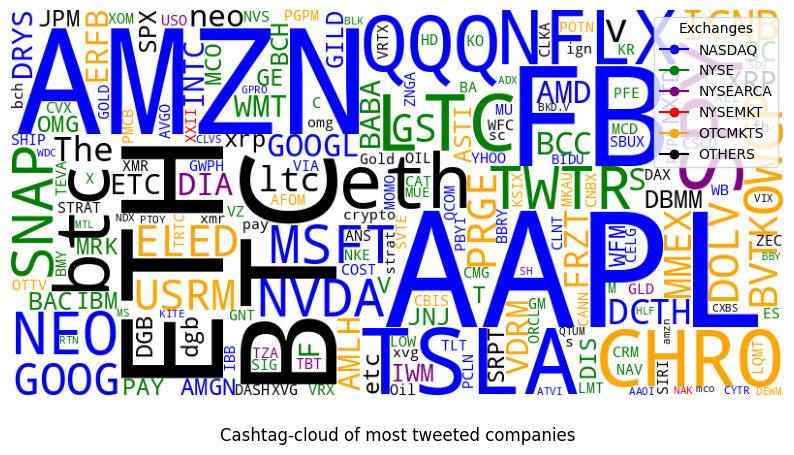

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Step 1: Read entities dataset and filter rows
filtered_entities_df = entities_df[entities_df['entity_type'] == 'symbol']

# Step 2: Create a dictionary from the filtered data
symbol_count_dict = filtered_entities_df['text'].value_counts().to_dict()

# Step 3: Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(symbol_count_dict)

# Step 4: Read companies dataset
companies_df

# Step 5: Assign unique colors to exchanges
exchange_colors = {
    "NASDAQ": 'blue',
    "NYSE": 'green',
    "NYSEARCA": 'purple',
    "NYSEMKT": 'red',
    "OTCMKTS": 'orange',
    "OTHERS": 'black'  # Assign 'black' for "OTHERS" or missing values
}

# Step 6: Match symbols to companies and assign colors
def assign_color(ticker):
    exchange = companies_df.loc[companies_df['ticker'] == ticker, 'exchange'].values
    if len(exchange) > 0:
        exchange = exchange[0]
        return exchange_colors.get(exchange, exchange_colors["OTHERS"])
    return exchange_colors["OTHERS"]  # Assign 'black' for missing values

# Assign colors to symbols
symbol_colors = {symbol: assign_color(symbol) for symbol in symbol_count_dict.keys()}

# Step 7: Plot the word cloud with assigned colors
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud.recolor(color_func=lambda word, font_size, position, orientation, **kwargs: symbol_colors.get(word, 'red')))
plt.axis('off')

# Step 8: Create a color legend
legend_elements = [Line2D([0], [0], marker='o', color=color, label=exchange) for exchange, color in exchange_colors.items()]
plt.legend(handles=legend_elements, title='Exchanges', loc='upper right')

# Step 9: Add a title beneath the plot
plt.text(0.5, -0.1, "Cashtag-cloud of most tweeted companies", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

# Show the plot
plt.show()

### Mean tweet volume per hour

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


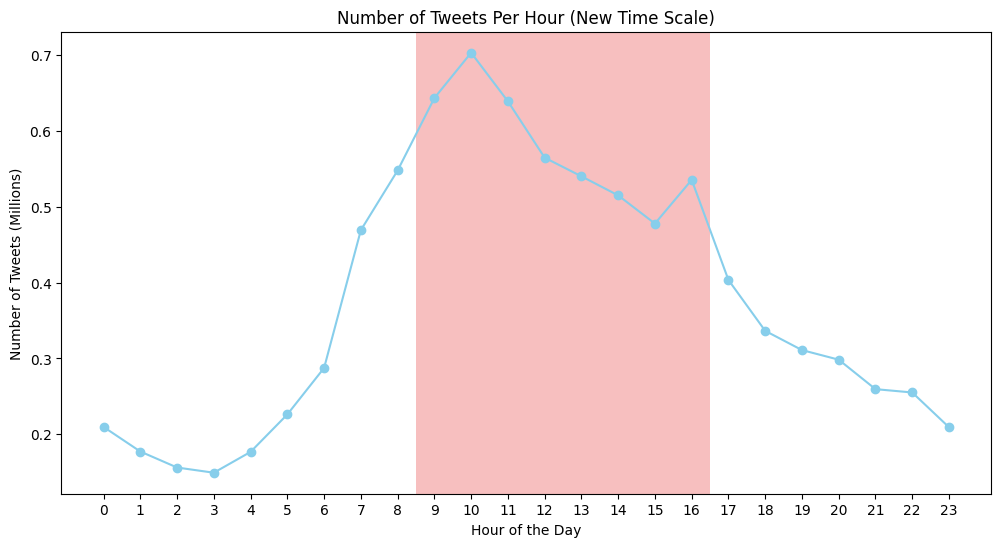

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from pytz import timezone

# Verify if GPU is available
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# Step 1: Read the tweets dataset
tweets_df

# Step 2: Convert the "created_at" column to datetime with a specified format
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'], format='%a %b %d %H:%M:%S %z %Y')

# Step 3: Change the time zone to a new one (e.g., 'US/Central')
tweets_df['created_at'] = tweets_df['created_at'].dt.tz_convert('US/Central')

# Step 4: Adjust time
tweets_df['created_at_adjusted'] = (tweets_df['created_at'].dt.hour + 1) % 24

# Step 5: Create a plot of the number of tweets per hour
tweets_per_hour = tweets_df['created_at_adjusted'].value_counts().sort_index()

# Step 6: Identify peak hours and highlight the background (9 am to 16 pm)
peak_hours = tweets_per_hour.loc[9:16].idxmax()

plt.figure(figsize=(12, 6))

# Divide y-labels by 1 million
tweets_per_hour = tweets_per_hour / 1000000

# Plot the line chart
tweets_per_hour.plot(kind='line', marker='o', color='skyblue')

# Highlight background for the specified peak hours (9 am to 4 pm)
plt.axvspan(9 - 0.5, 16 + 0.5, facecolor='lightcoral', alpha=0.5)

plt.title('Number of Tweets Per Hour (New Time Scale)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets (Millions)')
plt.xticks(range(24))
plt.show()

### Distribution of the number of cashtags per tweet

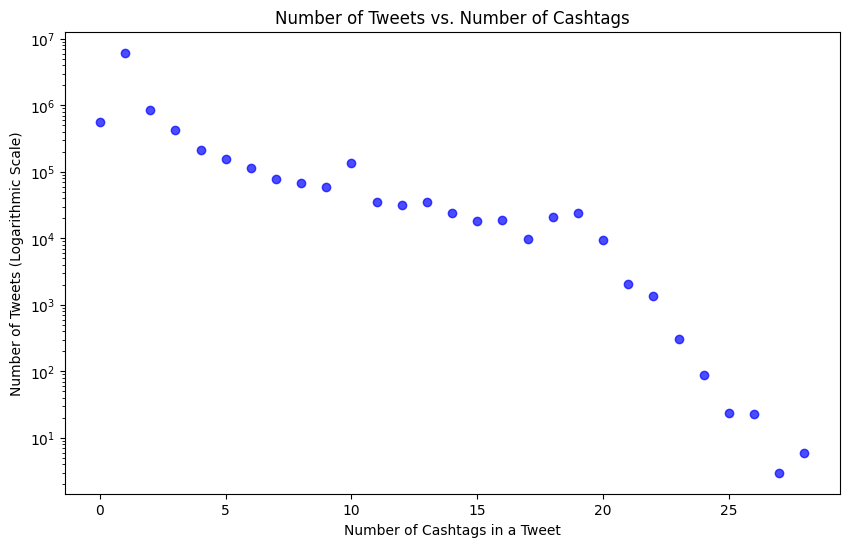

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the tweets dataset
tweets_df

# Extract cashtags from the "text" column
tweets_df['cashtags'] = tweets_df['text'].str.findall(r'\$[A-Z]+')

# Count the number of cashtags in each tweet
tweets_df['cashtag_count'] = tweets_df['cashtags'].apply(lambda x: len(x))

# Limit the cashtag count to a maximum of 30
tweets_df['cashtag_count'] = tweets_df['cashtag_count'].clip(upper=30)

# Count the number of tweets for each cashtag count
tweets_per_cashtag_count = tweets_df['cashtag_count'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Use logarithmic scale for the y-axis
plt.yscale('log')

# Scatter plot with blue dots
plt.scatter(tweets_per_cashtag_count.index, tweets_per_cashtag_count.values, color='blue', alpha=0.7)

plt.title('Number of Tweets vs. Number of Cashtags')
plt.xlabel('Number of Cashtags in a Tweet')
plt.ylabel('Number of Tweets (Logarithmic Scale)')
plt.show()

### Calculating time-series for all of Stocks

In [ ]:
import pandas as pd
import json
import os
from tqdm import tqdm

# Assuming data_folder is the path to the folder containing the datasets
data_folder = './'

# Step 1: Read the datasets
entities_df
tweets_df

# Filter symbol entities
symbol_entities_df = entities_df[entities_df['entity_type'] == 'symbol']

# Step 2: Initialize variables
tweets_count_dict = {}

# Step 3: Iterate over symbol entities dataset and update the dictionary
last_tweet_index = 0
current_date = None
current_hour = None

for index, entity_row in tqdm(symbol_entities_df.iterrows(), total=len(symbol_entities_df), desc="Processing Entities"):
    cashtag = entity_row['text']
    tweet_id = entity_row['tweet_id']

    # Find the corresponding tweet in the tweets dataset
    while last_tweet_index < len(tweets_df) and tweets_df.at[last_tweet_index, 'id'] < tweet_id:
        current_date = pd.to_datetime(tweets_df.at[last_tweet_index, 'created_at'], format='%a %b %d %H:%M:%S %z %Y').date()
        current_hour = pd.to_datetime(tweets_df.at[last_tweet_index, 'created_at'], format='%a %b %d %H:%M:%S %z %Y').hour
        last_tweet_index += 1

    # Check if tweet_id matches
    if last_tweet_index < len(tweets_df) and tweets_df.at[last_tweet_index, 'id'] == tweet_id:
        # Update the dictionary dynamically
        if cashtag not in tweets_count_dict:
            tweets_count_dict[cashtag] = {}

        if current_date not in tweets_count_dict[cashtag]:
            tweets_count_dict[cashtag][current_date] = {}

        if current_hour not in tweets_count_dict[cashtag][current_date]:
            tweets_count_dict[cashtag][current_date][current_hour] = 0

        tweets_count_dict[cashtag][current_date][current_hour] += 1


### Saving Time-Series File

In [ ]:
import json
import os
import datetime

# Convert date objects to strings for JSON serialization
def convert_dates_to_str(d):
    if isinstance(d, datetime.date):
        return d.strftime('%Y-%m-%d')
    elif isinstance(d, dict):
        return {convert_dates_to_str(k): convert_dates_to_str(v) for k, v in d.items()}
    elif isinstance(d, (list, tuple)):
        return [convert_dates_to_str(item) for item in d]
    return d

# Convert date objects to strings in the dictionary
tweets_count_dict_str = convert_dates_to_str(tweets_count_dict)

# Save the dictionary to a file
save_path = os.path.join(data_folder, 'tweets_count_dict.json')
with open(save_path, 'w') as file:
    json.dump(tweets_count_dict_str, file)

### Loading Time-Series File

In [ ]:
import json
from datetime import datetime

# Load the dictionary from the file
file_path = './tweets_count_dict.json'  # Change this to the correct path
with open(file_path, 'r') as file:
    loaded_dict_str = json.load(file)

# Create a new dictionary with datetime keys
tweets_count_dict = {}

# Function to convert date and hour strings to datetime objects
def convert_to_datetime(date_str, hour_str):
    if date_str.lower() == 'null':
        return None  # Handle null value as needed
    if hour_str.lower() == 'null':
        hour_str = '00'  # Use a default hour if needed
    date_time_str = f"{date_str} {hour_str}"
    return datetime.strptime(date_time_str, "%Y-%m-%d %H")


for cashtag, date_dict in loaded_dict_str.items():
    # Convert cashtag to uppercase
    cashtag_upper = cashtag.upper()

    if cashtag_upper not in tweets_count_dict:
        tweets_count_dict[cashtag_upper] = {}

    for date_str, hour_dict in date_dict.items():
        date_time = convert_to_datetime(date_str, "00")  # Use a default hour if needed
        if date_time is not None:
            if date_time not in tweets_count_dict[cashtag_upper]:
                tweets_count_dict[cashtag_upper][date_time] = {}
            for hour_str, count in hour_dict.items():
                hour_time = datetime.strptime(hour_str, "%H")
                if hour_time.hour not in tweets_count_dict[cashtag_upper][date_time]:
                    tweets_count_dict[cashtag_upper][date_time][hour_time.hour] = count
                else:
                    tweets_count_dict[cashtag_upper][date_time][hour_time.hour] += count

### Finding peak hours

In [ ]:
import numpy as np
from collections import defaultdict
from tqdm import tqdm

# Initialize dictionaries
average_tweets_per_hour = {}
peak_hours = defaultdict(lambda: defaultdict(set))

# Count how many times each cashtag appears
cashtag_counts = entities_df['text'].value_counts()

# Add the counts to the companies dataframe
companies_df['tweet_count'] = companies_df['ticker'].map(cashtag_counts)

# Fill NaN values with 0 for companies that were not tweeted about
companies_df['tweet_count'].fillna(0, inplace=True)

# Top 100 most tweeted stocks
top_100_tweeted = companies_df.nlargest(100, 'tweet_count')['ticker']

# Top 100 biggest stocks with 'exchange' column value equals to 'OTCMKTS'
top_100_otcmkts = companies_df[companies_df['exchange'] == 'OTCMKTS'].nlargest(100, 'tweet_count')['ticker']

# Randomly select 500 cashtags from all companies
random_500 = companies_df['ticker'].sample(500, replace=False)

# Combine all selected cashtags
cashtags = pd.concat([top_100_tweeted, top_100_otcmkts, random_500]).unique()

# Iterate over each cashtag with tqdm for progress tracking
for cashtag in tqdm(cashtags, desc='Processing cashtags'):
    if cashtag in tweets_count_dict:
        all_dates = list(tweets_count_dict[cashtag].keys())

        # Calculate the total number of tweets and hours
        total_tweets = 0
        all_tweet_counts = []

        # Iterate through each date
        for date in all_dates:
            total_tweets += sum(tweets_count_dict[cashtag][date].values())
            all_tweet_counts.extend(list(tweets_count_dict[cashtag][date].values()))

        # Calculate average tweets per hour
        average_tweets_per_hour[cashtag] = total_tweets / len(all_tweet_counts)

        # Collect all hours in the dataset
        all_hours = set(hour for date in all_dates for hour in tweets_count_dict[cashtag][date])

        # Iterate through each date and all hours to identify peak hours
        for date in all_dates:
            for hour in all_hours:
                tweet_count = tweets_count_dict[cashtag][date].get(hour, 0)
                if tweet_count > average_tweets_per_hour[cashtag] + 5 * np.std(all_tweet_counts + [0] * (len(all_hours) - len(all_tweet_counts))):
                    peak_hours[date][hour].add(cashtag)

print(peak_hours)

Processing cashtags: 100%|██████████| 676/676 [02:27<00:00,  4.59it/s]

defaultdict(<function <lambda> at 0x7f07a9a27ac0>, {datetime.datetime(2017, 6, 5, 0, 0): defaultdict(<class 'set'>, {13: {'AAPL', 'NVDA', 'TSLA', 'WB', 'AMZN', 'EBAY', 'DIA', 'TLT', 'QQQ', 'SNAP', 'PRGE', 'TBT', 'SPY', 'SBUX'}, 14: {'LVS', 'T', 'PCLN', 'GOOGL', 'AMZN', 'SC', 'PRGE', 'MSFT', 'JNJ', 'AAPL', 'NFLX', 'WB', 'AMD', 'CRM', 'TLT', 'SNAP', 'WMT', 'YHOO', 'SBUX'}, 16: {'TSLA', 'WB', 'SNAP', 'SBUX'}, 17: {'TSLA', 'WB', 'SNAP', 'PRGE', 'SBUX'}, 12: {'WB', 'DIA', 'TLT', 'QQQ', 'TBT', 'SBUX'}, 15: {'CRM', 'T', 'WMT', 'AMD', 'YHOO', 'PCLN', 'JNJ'}, 21: {'SBUX'}, 22: {'SBUX'}, 18: {'ICLD'}}), datetime.datetime(2017, 6, 17, 0, 0): defaultdict(<class 'set'>, {13: {'GOOG', 'GS', 'ZNGA', 'PMCB', 'VRX', 'CNBX', 'LQMT', 'CHRO', 'PCLN', 'AMGN', 'C', 'TRTC', 'ICNB', 'FRZT', 'OWCP', 'MU', 'FB', 'AAPL', 'JD', 'SVTE', 'MCOA', 'SNAP', 'VDRM'}, 14: {'GS', 'ZNGA', 'PMCB', 'AMGN', 'CNBX', 'C', 'LQMT', 'SNAP', 'SVTE'}, 12: {'SC'}, 21: {'NKE', 'VZ'}}), datetime.datetime(2017, 6, 18, 0, 0): defaultdict

### Stock time series, for 12 highly tweeted stocks

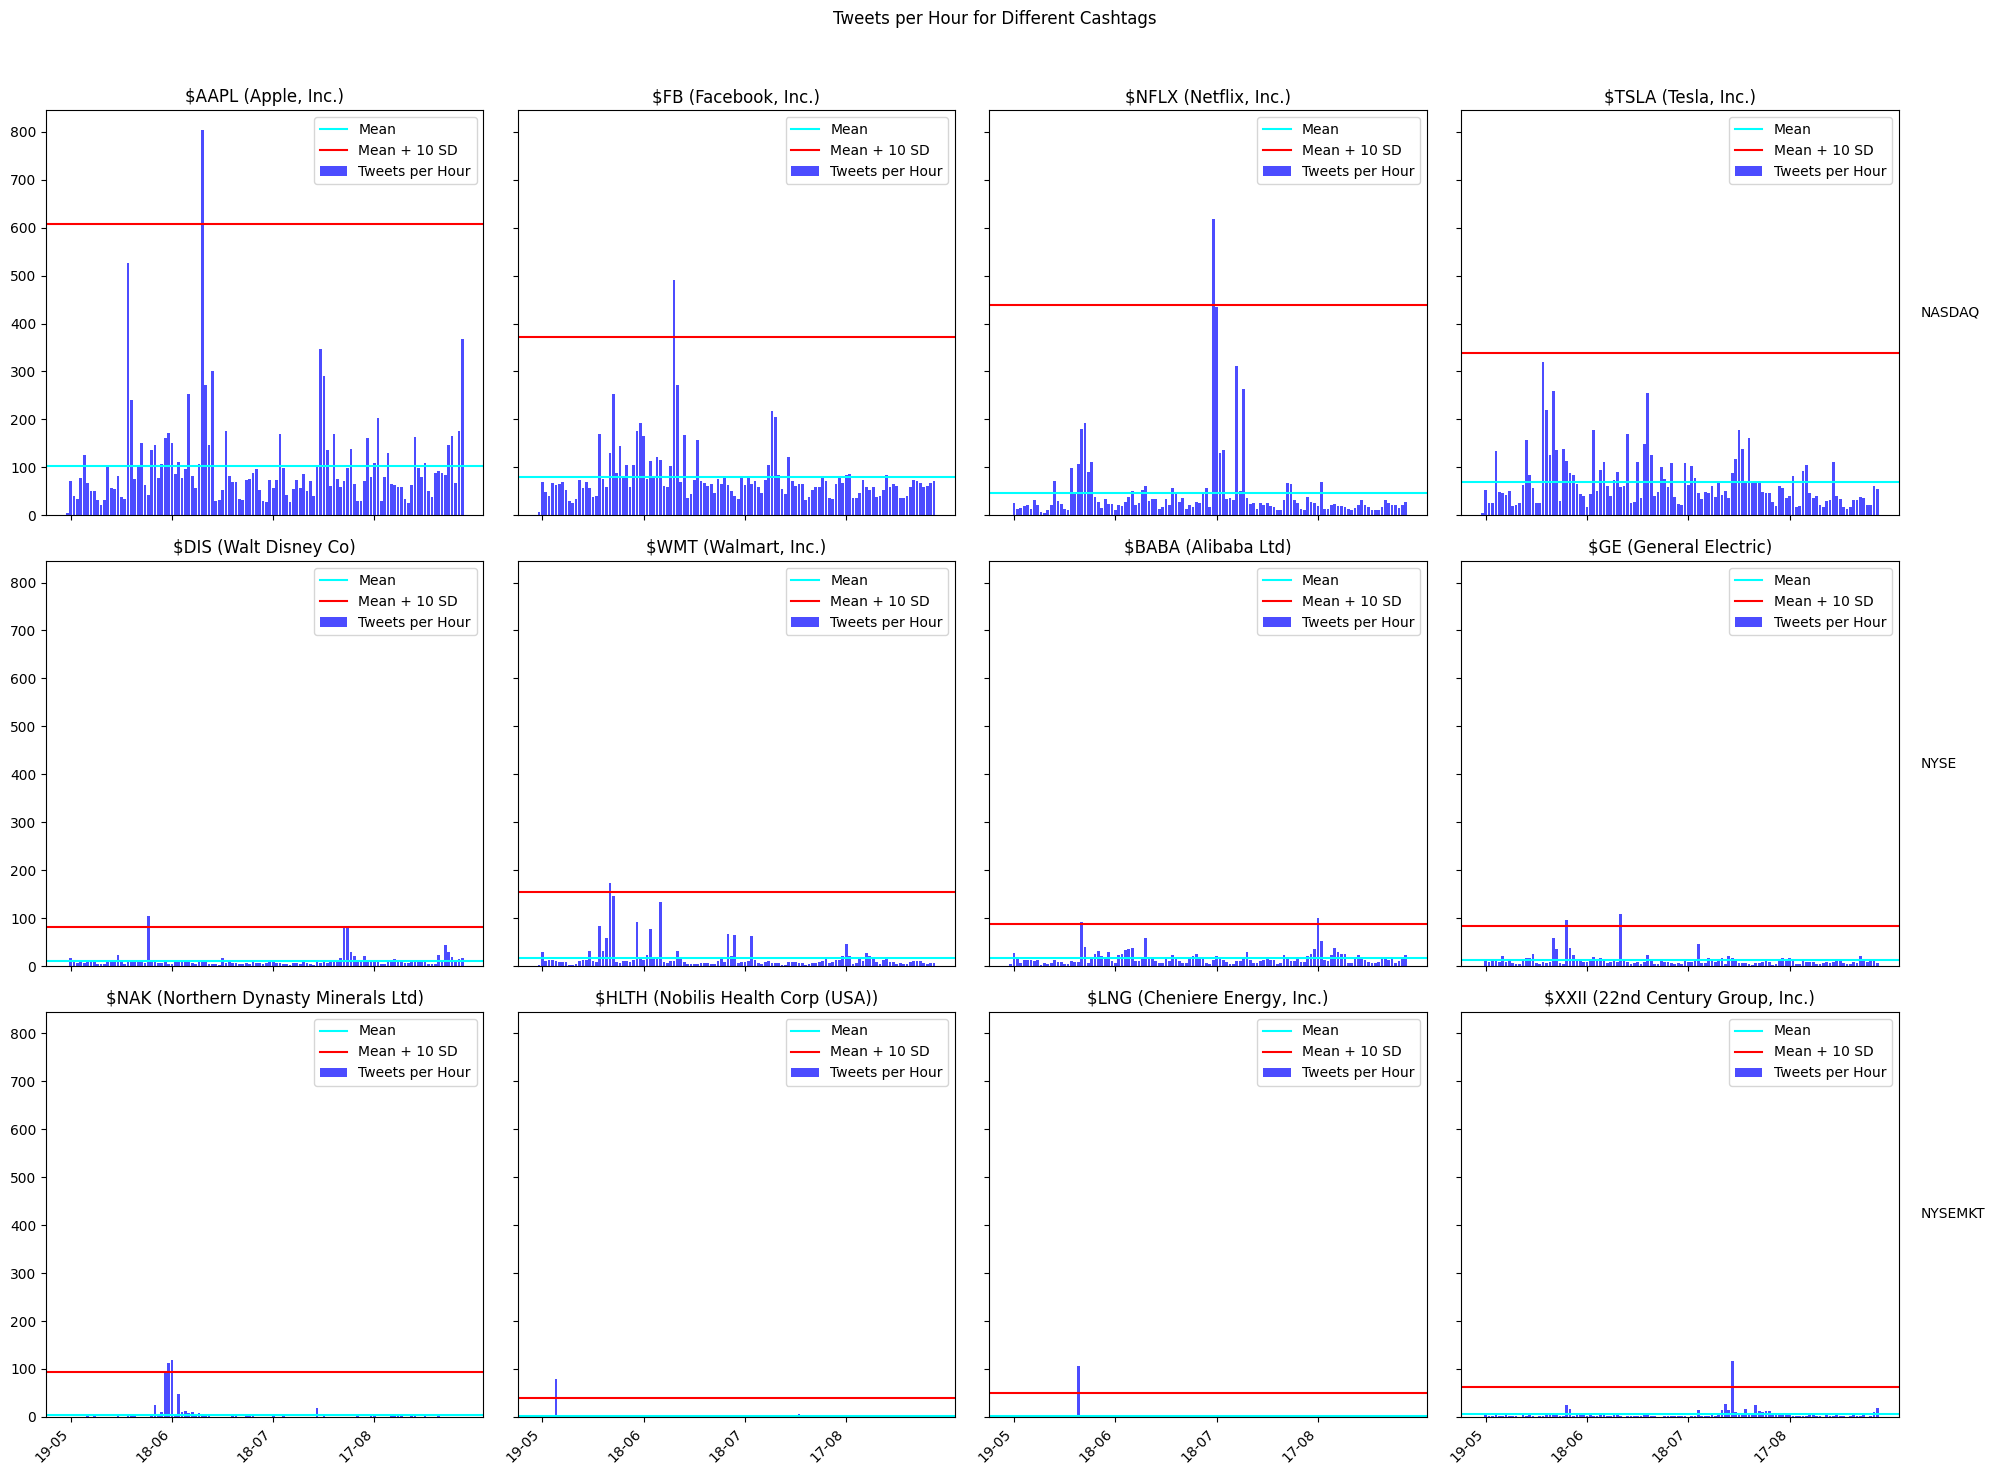

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

# Exchange names, Cashtags and plot names
cashtags = ['AAPL', 'FB', 'NFLX', 'TSLA', 'DIS', 'WMT', 'BABA', 'GE', 'NAK', 'HLTH', 'LNG', 'XXII']
exchange_names = ['NASDAQ'] * 4 + ['NYSE'] * 4 + ['NYSEMKT'] * 4
plot_names = ['$AAPL (Apple, Inc.)', '$FB (Facebook, Inc.)', '$NFLX (Netflix, Inc.)', '$TSLA (Tesla, Inc.)',
              '$DIS (Walt Disney Co)', '$WMT (Walmart, Inc.)', '$BABA (Alibaba Ltd)', '$GE (General Electric)',
              '$NAK (Northern Dynasty Minerals Ltd)', '$HLTH (Nobilis Health Corp (USA))', '$LNG (Cheniere Energy, Inc.)', '$XXII (22nd Century Group, Inc.)']

# Step 4: Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle('Tweets per Hour for Different Cashtags')

# Step 5: Iterate through each cashtag and draw the subplot
for i, cashtag in enumerate(cashtags):
    if cashtag in tweets_count_dict:
        ax = axes[i // 4, i % 4]

        # Initialize lists to store dates and daily means
        all_dates = []
        all_daily_means = []

        # Iterate through each date
        for date in tweets_count_dict[cashtag]:
            # Extract hours and corresponding counts for the date
            counts = list(tweets_count_dict[cashtag][date].values())

            # Calculate the total count for the day
            total_count = sum(counts)

            # Calculate the daily mean by dividing total count by 24
            daily_mean = total_count / 24

            # Append the date and corresponding daily mean to the lists
            all_dates.append(date)
            all_daily_means.append(daily_mean)

        # Convert dates to matplotlib-compatible format (if needed)
        all_dates = [np.datetime64(date) for date in all_dates]

        # Truncate x-labels to only display day and month
        tick_labels = pd.to_datetime(all_dates[::30]).strftime('%d-%m').tolist()
        ax.set_xticks(all_dates[::30])  # Display every 30th date for better readability
        ax.set_xticklabels(tick_labels, rotation=45, ha='right')

        # Plot daily means for each cashtag using bar plot
        ax.bar(all_dates, all_daily_means, label='Tweets per Hour', color='blue', alpha=0.7)

        # Calculate mean and mean + 10 standard deviations for daily means
        mean_value = np.mean(all_daily_means)
        std_dev = np.std(all_daily_means)
        upper_bound = mean_value + 5 * std_dev

        # Plot mean line (solid cyan) for daily means
        ax.axhline(mean_value, color='cyan', linestyle='solid', label='Mean')

        # Plot upper bound line (solid red) for daily means
        ax.axhline(upper_bound, color='red', linestyle='solid', label='Mean + 10 SD')

        if i % 4 == 3:
            ax.text(1.05, 0.5, f'{exchange_names[i]}', transform=ax.transAxes, fontsize=10, va='center')

        ax.set_title(plot_names[i])
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Number of peaks detected, as a function of K

<ipython-input-30-6c6b9bc0e74e>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_cashtags = random.sample(loaded_dict_str.keys(), 700)


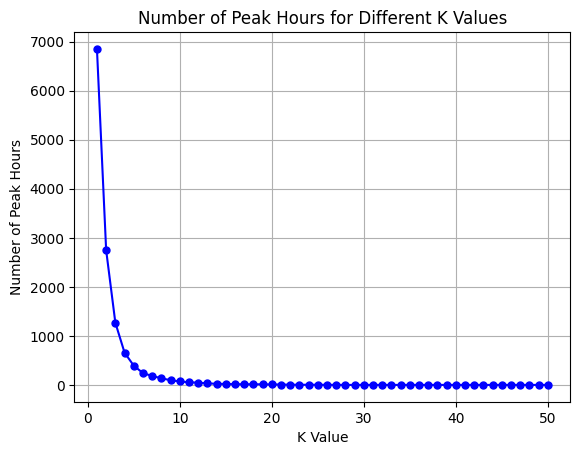

In [ ]:
import random

# Select 700 cashtags randomly
random_cashtags = random.sample(loaded_dict_str.keys(), 700)

# Initialize lists to store data for plotting
k_values = list(range(1, 51))
peak_counts = []

# Iterate over different values of K
for k in k_values:
    peak_count = 0  # Count of peak hours for the current K value

    # Iterate through each randomly selected cashtag
    for cashtag in random_cashtags:
        # Convert cashtag to uppercase
        cashtag_upper = cashtag.upper()

        # Initialize lists to store hourly tweet counts
        hourly_tweet_counts = []

        # Iterate through each date
        for date_str, hour_dict in loaded_dict_str[cashtag].items():
            date_time = convert_to_datetime(date_str, "00")  # Use a default hour if needed
            if date_time is not None:
                hourly_tweet_counts.extend(list(hour_dict.values()))

        # Calculate the average tweets per hour for the cashtag
        average_tweets_per_hour = np.mean(hourly_tweet_counts)

        # Count the number of peak hours (hours with tweets more than K standard deviations from average)
        for date_str, hour_dict in loaded_dict_str[cashtag].items():
            for count in hour_dict.values():
                if count > average_tweets_per_hour + k * np.std(hourly_tweet_counts):
                    peak_count += 1

    # Append the peak count for the current K value
    peak_counts.append(peak_count)

# Plot the number of peaks for each K value
plt.plot(k_values, peak_counts, marker='o', color='blue', linestyle='-', markersize=5)
plt.title('Number of Peak Hours for Different K Values')
plt.xlabel('K Value')
plt.ylabel('Number of Peak Hours')
plt.grid(True)
plt.show()

### Distribution of number of retweets and cashtags and their difference in all of the tweets and peak tweets

In [ ]:
# Use the two bottom functions to get the date and hour keys being used for peak_hours, from a tweets_df['created_at'] value

# Function to convert Twitter timestamp to datetime
def convert_twitter_timestamp(tweet_timestamp):
    return datetime.strptime(tweet_timestamp, "%a %b %d %H:%M:%S %z %Y")

def date_to_key_date_pipeline(d):
    date = convert_twitter_timestamp(tweet_timestamp).replace(minute=0, second=0, microsecond=0)

    # Convert to datetime object with midnight time
    converted_datetime = datetime.combine(date.date(), datetime.min.time())
    return converted_datetime

def date_to_key_hour_pipeline(d):
    date = convert_twitter_timestamp(tweet_timestamp).replace(minute=0, second=0, microsecond=0)
    return date.hour

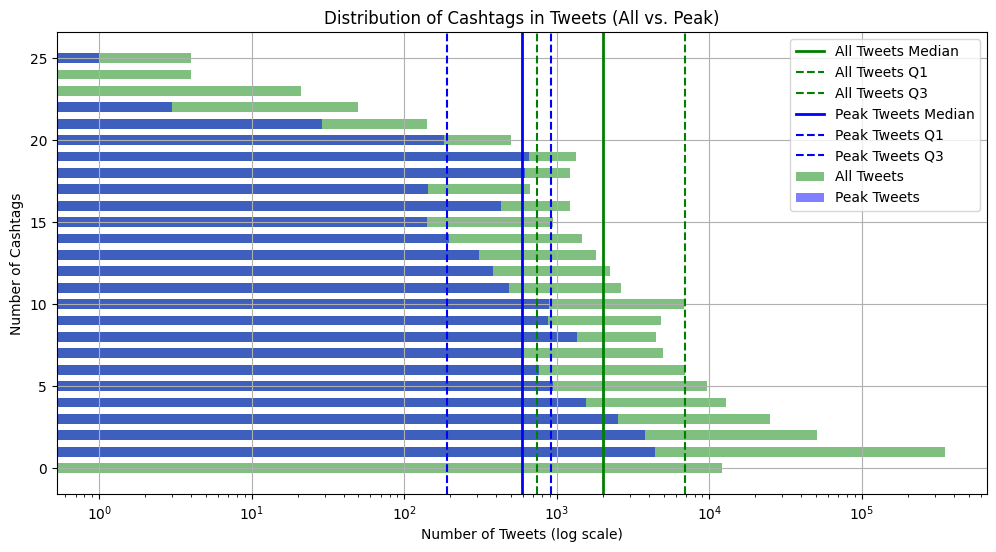

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime

# Sample 500000 random indexes from tweets_df rows
sampled_indexes = np.random.choice(tweets_df.index, 500000, replace=False)

# Create a new DataFrame with sampled indexes
sampled_tweets_df = tweets_df.loc[sampled_indexes]

# Initialize dictionaries to keep track of the number of tweets with a specific number of cashtags
tweets_with_cashtags = {}
peak_tweets_with_cashtags = {}

# Iterate over the sampled DataFrame
for _, tweet in sampled_tweets_df.iterrows():
    # Extract cashtags from the 'text' column
    cashtags = re.findall(r'\$(\b[A-Z][A-Z]+\b)', tweet['text'].upper())

    # Extract date and hour in the desired formats
    tweet_timestamp = tweet['created_at']

    # Check if the tweet is a peak tweet
    if date_to_key_date_pipeline(tweet_timestamp) in peak_hours and date_to_key_hour_pipeline(tweet_timestamp) in peak_hours[date_to_key_date_pipeline(tweet_timestamp)]:
        peak_tweet = any(cashtag in peak_hours[date_to_key_date_pipeline(tweet_timestamp)][date_to_key_hour_pipeline(tweet_timestamp)] for cashtag in cashtags)
    else:
        peak_tweet = False

    # Count the number of cashtags in the tweet
    num_cashtags = len(cashtags)

    # Update the dictionary for all tweets
    if num_cashtags in tweets_with_cashtags:
        tweets_with_cashtags[num_cashtags] += 1
    else:
        tweets_with_cashtags[num_cashtags] = 1

    # Update the dictionary for peak tweets
    if peak_tweet:
        if num_cashtags in peak_tweets_with_cashtags:
            peak_tweets_with_cashtags[num_cashtags] += 1
        else:
            peak_tweets_with_cashtags[num_cashtags] = 1

# Plot the distributions
plt.figure(figsize=(12, 6))

# Plot distribution for all tweets on the left side of the x-axis line
plt.barh(list(tweets_with_cashtags.keys()), list(tweets_with_cashtags.values()), color='green', alpha=0.5, label='All Tweets', height=0.6)

# Plot distribution for peak tweets on the right side of the x-axis line
plt.barh(list(peak_tweets_with_cashtags.keys()), list(peak_tweets_with_cashtags.values()), color='blue', alpha=0.5, label='Peak Tweets', height=0.6)

# Set x-axis to logarithmic scale
plt.xscale('log')

# Draw median and quartiles for all tweets
all_tweets_median = np.median(list(tweets_with_cashtags.values()))
all_tweets_q1 = np.percentile(list(tweets_with_cashtags.values()), 25)
all_tweets_q3 = np.percentile(list(tweets_with_cashtags.values()), 75)
plt.axvline(all_tweets_median, color='green', linestyle='-', linewidth=2, label='All Tweets Median')
plt.axvline(all_tweets_q1, color='green', linestyle='--', linewidth=1.5, label='All Tweets Q1')
plt.axvline(all_tweets_q3, color='green', linestyle='--', linewidth=1.5, label='All Tweets Q3')

# Draw median and quartiles for peak tweets
peak_tweets_median = np.median(list(peak_tweets_with_cashtags.values()))

# Check if the list is not empty before calculating percentiles
if list(peak_tweets_with_cashtags.values()):
    peak_tweets_q1 = np.percentile(list(peak_tweets_with_cashtags.values()), 25)
    peak_tweets_q3 = np.percentile(list(peak_tweets_with_cashtags.values()), 75)
else:
    peak_tweets_q1, peak_tweets_q3 = np.nan, np.nan

plt.axvline(peak_tweets_median, color='blue', linestyle='-', linewidth=2, label='Peak Tweets Median')
plt.axvline(peak_tweets_q1, color='blue', linestyle='--', linewidth=1.5, label='Peak Tweets Q1')
plt.axvline(peak_tweets_q3, color='blue', linestyle='--', linewidth=1.5, label='Peak Tweets Q3')

# Set plot labels and legend
plt.title('Distribution of Cashtags in Tweets (All vs. Peak)')
plt.xlabel('Number of Tweets (log scale)')
plt.ylabel('Number of Cashtags')
plt.legend()
plt.grid(True)
plt.axvline(0, color='black', linestyle='-', linewidth=1)  # Vertical x-axis line
plt.show()


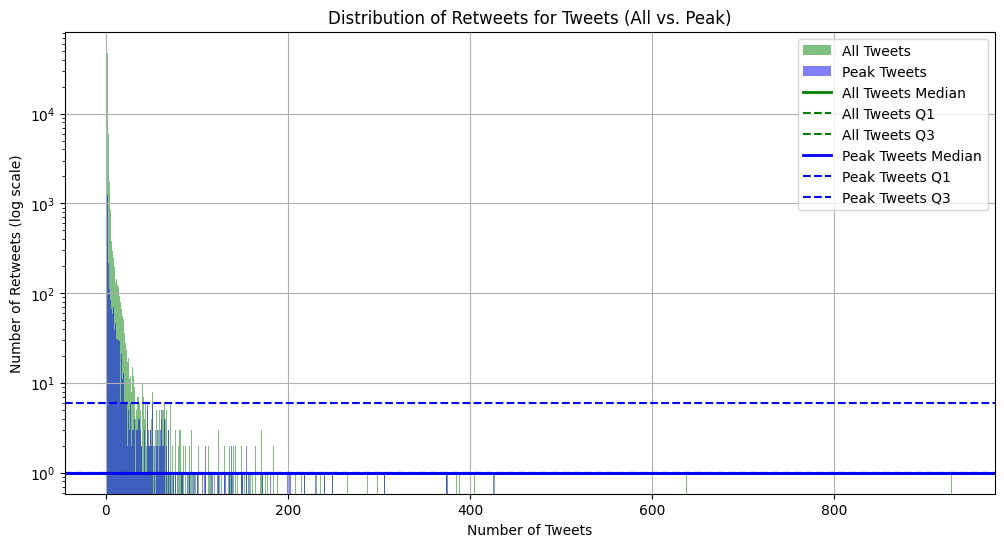

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re

# Sample 500000 random indexes from tweets_df rows
sampled_indexes = np.random.choice(tweets_df.index, 500000, replace=False)

# Create a new DataFrame with sampled indexes
sampled_tweets_df = tweets_df.loc[sampled_indexes]

# Initialize dictionaries to keep track of the number of retweets for each tweet
retweets_count_all = {}
retweets_count_peak = {}

# Function to check if a tweet is a retweet
def is_retweet(tweet):
    return tweet['retweeted_status_id'] != 0

# Function to get the original tweet id for retweets
def get_original_tweet_id(tweet):
    return tweet['retweeted_status_id']

# Iterate over the sampled DataFrame
for _, tweet in sampled_tweets_df.iterrows():
    # Check if the tweet is a retweet
    if is_retweet(tweet):
        original_tweet_id = get_original_tweet_id(tweet)

        # Extract cashtags from the 'text' column
        cashtags = re.findall(r'\$(\b[A-Z][A-Z]+\b)', tweet['text'].upper())

        # Update the dictionary for all tweets
        if original_tweet_id in retweets_count_all:
            retweets_count_all[original_tweet_id] += 1
        else:
            retweets_count_all[original_tweet_id] = 1

        # Extract date and hour in the desired formats
        tweet_timestamp = tweet['created_at']

        # Check if the tweet is a peak tweet
        if date_to_key_date_pipeline(tweet_timestamp) in peak_hours and date_to_key_hour_pipeline(tweet_timestamp) in peak_hours[date_to_key_date_pipeline(tweet_timestamp)]:
            peak_tweet = any(cashtag in peak_hours[date_to_key_date_pipeline(tweet_timestamp)][date_to_key_hour_pipeline(tweet_timestamp)] for cashtag in cashtags)
        else:
            peak_tweet = False

        # Update the dictionary for peak tweets
        if peak_tweet:
            if original_tweet_id in retweets_count_peak:
                retweets_count_peak[original_tweet_id] += 1
            else:
                retweets_count_peak[original_tweet_id] = 1

# Plot the distributions
plt.figure(figsize=(12, 6))

# Plot distribution for all tweets on the left side of the x-axis line
if retweets_count_all:
    plt.hist(retweets_count_all.values(), color='green', alpha=0.5, bins=range(1, max(retweets_count_all.values())+2), label='All Tweets')

# Plot distribution for peak tweets on the right side of the x-axis line
if retweets_count_peak:
    plt.hist(retweets_count_peak.values(), color='blue', alpha=0.5, bins=range(1, max(retweets_count_peak.values())+2), label='Peak Tweets')

# Set y-axis to logarithmic scale
plt.yscale('log')

# Draw median and quartiles for all tweets
if retweets_count_all:
    all_tweets_median = np.median(list(retweets_count_all.values()))
    all_tweets_q1 = np.percentile(list(retweets_count_all.values()), 25)
    all_tweets_q3 = np.percentile(list(retweets_count_all.values()), 75)
    plt.axhline(all_tweets_median, color='green', linestyle='-', linewidth=2, label='All Tweets Median')
    plt.axhline(all_tweets_q1, color='green', linestyle='--', linewidth=1.5, label='All Tweets Q1')
    plt.axhline(all_tweets_q3, color='green', linestyle='--', linewidth=1.5, label='All Tweets Q3')

# Draw median and quartiles for peak tweets
if retweets_count_peak:
    peak_tweets_median = np.median(list(retweets_count_peak.values()))
    peak_tweets_q1 = np.percentile(list(retweets_count_peak.values()), 25)
    peak_tweets_q3 = np.percentile(list(retweets_count_peak.values()), 75)
    plt.axhline(peak_tweets_median, color='blue', linestyle='-', linewidth=2, label='Peak Tweets Median')
    plt.axhline(peak_tweets_q1, color='blue', linestyle='--', linewidth=1.5, label='Peak Tweets Q1')
    plt.axhline(peak_tweets_q3, color='blue', linestyle='--', linewidth=1.5, label='Peak Tweets Q3')

# Set plot labels and legend
plt.title('Distribution of Retweets for Tweets (All vs. Peak)')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Retweets (log scale)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linestyle='-', linewidth=1)  # Vertical x-axis line
plt.show()

### Co-occurrence graph of stocks mentioned in all of the tweets & peak tweets

In [ ]:
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
from tqdm import tqdm

# Sample 1000 random indexes from tweets_df rows
sampled_indexes = np.random.choice(tweets_df.index, 1000, replace=False)

# Create a new DataFrame with sampled indexes
sampled_tweets_df = tweets_df.loc[sampled_indexes]

# Initialize a graph
G = nx.Graph()

# Color mapping for exchanges
exchange_colors = {
    'NASDAQ': 'blue',
    'NYSE': 'red',
    'NYSEMKT': 'green',
    'NYSEARCA': 'orange',
    'OTCMKTS': 'purple',
    'OTHERS': 'gray'
}

# Iterate over the sampled DataFrame
for _, tweet in tqdm(sampled_tweets_df.iterrows(), total=len(sampled_tweets_df), desc='Building Graph'):
    # Extract cashtags from the 'text' column
    cashtags = re.findall(r'\$([A-Z]+)', tweet['text'])

    # Iterate over pairs of cashtags
    for i in range(len(cashtags)):
        for j in range(i+1, len(cashtags)):
            # Get the corresponding tickers and exchanges
            ticker_i = cashtags[i]
            ticker_j = cashtags[j]
            exchange_i = companies_df.loc[companies_df['ticker'] == ticker_i, 'exchange'].values
            exchange_j = companies_df.loc[companies_df['ticker'] == ticker_j, 'exchange'].values

            # Add nodes and edges if they are not already connected
            if exchange_i.size > 0 and exchange_j.size > 0 and ticker_i != ticker_j:
                exchange_i = exchange_i[0]
                exchange_j = exchange_j[0]
                G.add_node(ticker_i, exchange=exchange_i, name=ticker_i)
                G.add_node(ticker_j, exchange=exchange_j, name=ticker_j)
                if not G.has_edge(ticker_i, ticker_j):
                    G.add_edge(ticker_i, ticker_j)

# Create node positions
pos = nx.spring_layout(G, seed=42)

# Create node and edge traces
node_traces = {}
edge_trace = go.Scatter(x=[], y=[], mode='lines')

for node in G.nodes():
    x, y = pos[node]
    exchange = G.nodes[node]['exchange']
    name = G.nodes[node]['name']
    if exchange not in node_traces:
        node_traces[exchange] = go.Scatter(
            x=[],
            y=[],
            mode='markers+text',
            name=exchange,
            marker=dict(color=exchange_colors[exchange], size=15),
            text=name,
            textposition="bottom center"
        )
    node_traces[exchange]['x'] += (x,)
    node_traces[exchange]['y'] += (y,)

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)

# Create figure
fig = go.Figure(data=list(node_traces.values()) + [edge_trace],
                layout=go.Layout(title='Stocks Connected by Co-occurrence in Tweets', showlegend=True,
                                 hovermode='closest', margin=dict(b=20, l=5, r=5, t=40)))

# Show figure
fig.show()

Building Graph: 100%|██████████| 1000/1000 [00:28<00:00, 35.66it/s]


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objs as go
from tqdm import tqdm

# Sample 10000 random indexes from tweets_df rows
sampled_indexes = np.random.choice(tweets_df.index, 10000, replace=False)

# Create a new DataFrame with sampled indexes
sampled_tweets_df = tweets_df.loc[sampled_indexes]

# Initialize a graph
G = nx.Graph()

# Color mapping for exchanges
exchange_colors = {
    'NASDAQ': 'blue',
    'NYSE': 'red',
    'NYSEMKT': 'green',
    'NYSEARCA': 'orange',
    'OTCMKTS': 'purple',
    'OTHERS': 'gray'
}

# Iterate over the sampled DataFrame
for _, tweet in tqdm(sampled_tweets_df.iterrows(), total=len(sampled_tweets_df), desc='Building Graph'):

    # Check if the tweet is a peak tweet

    # Extract date and hour in the desired formats
    tweet_timestamp = tweet['created_at']

    # Extract cashtags from the 'text' column
    cashtags = re.findall(r'\$([A-Z]+)', tweet['text'])

    # Check if the tweet is a peak tweet
    if date_to_key_date_pipeline(tweet_timestamp) in peak_hours and date_to_key_hour_pipeline(tweet_timestamp) in peak_hours[date_to_key_date_pipeline(tweet_timestamp)]:
          peak_tweet = any(cashtag in peak_hours[date_to_key_date_pipeline(tweet_timestamp)][date_to_key_hour_pipeline(tweet_timestamp)] for cashtag in cashtags)
    else:
          peak_tweet = False

    if peak_tweet:

        # Iterate over pairs of cashtags
        for i in range(len(cashtags)):
            for j in range(i+1, len(cashtags)):
                # Get the corresponding tickers and exchanges
                ticker_i = cashtags[i]
                ticker_j = cashtags[j]
                exchange_i = companies_df.loc[companies_df['ticker'] == ticker_i, 'exchange'].values
                exchange_j = companies_df.loc[companies_df['ticker'] == ticker_j, 'exchange'].values

                # Add nodes and edges if they are not already connected
                if exchange_i.size > 0 and exchange_j.size > 0 and ticker_i != ticker_j:
                    exchange_i = exchange_i[0]
                    exchange_j = exchange_j[0]
                    G.add_node(ticker_i, exchange=exchange_i, name=ticker_i)
                    G.add_node(ticker_j, exchange=exchange_j, name=ticker_j)
                    if not G.has_edge(ticker_i, ticker_j):
                        G.add_edge(ticker_i, ticker_j)

# Create node positions
pos = nx.spring_layout(G, seed=42)

# Create node and edge traces
node_traces = {}
edge_trace = []

for node in G.nodes():
    x, y = pos[node]
    degree = G.degree[node]
    exchange = G.nodes[node]['exchange']
    name = G.nodes[node]['name']
    if exchange not in node_traces:
        node_traces[exchange] = {'x': [], 'y': [], 'size': [], 'label': []}
    node_traces[exchange]['x'].append(x)
    node_traces[exchange]['y'].append(y)
    node_traces[exchange]['size'].append(degree / 3 + 20)
    node_traces[exchange]['label'].append(name)

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace.append((x0, y0))
    edge_trace.append((x1, y1))
    edge_trace.append((None, None))

# Create node traces
node_traces_plotly = []
for exchange, data in node_traces.items():
    node_trace = go.Scatter(
        x=data['x'],
        y=data['y'],
        mode='markers',
        marker=dict(
            size=data['size'],
            color=exchange_colors[exchange],
            line=dict(width=2, color='black')
        ),
        text=data['label'],
        name=exchange,
        hoverinfo='text'
    )
    node_traces_plotly.append(node_trace)

# Create edge traces
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace_plotly = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.1, color='black'),
    hoverinfo='none',
    mode='lines'
)

# Create figure
fig = go.Figure(
    data=node_traces_plotly + [edge_trace_plotly],
    layout=go.Layout(
        title='Stocks Connected by Co-occurrence in Peak Tweets',
        titlefont_size=16,
        showlegend=True,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        annotations=[dict(
            text='Python code',
            showarrow=False,
            xref="paper", yref="paper",
            x=0.005, y=-0.002)],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)

fig.show()

Building Graph: 100%|██████████| 10000/10000 [01:55<00:00, 86.38it/s]


### Kernel Density Estimation of social and financial importance

<ipython-input-87-48b37ed81ce7>:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-48b37ed81ce7>:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-48b37ed81ce7>:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: Contour levels must be increasing

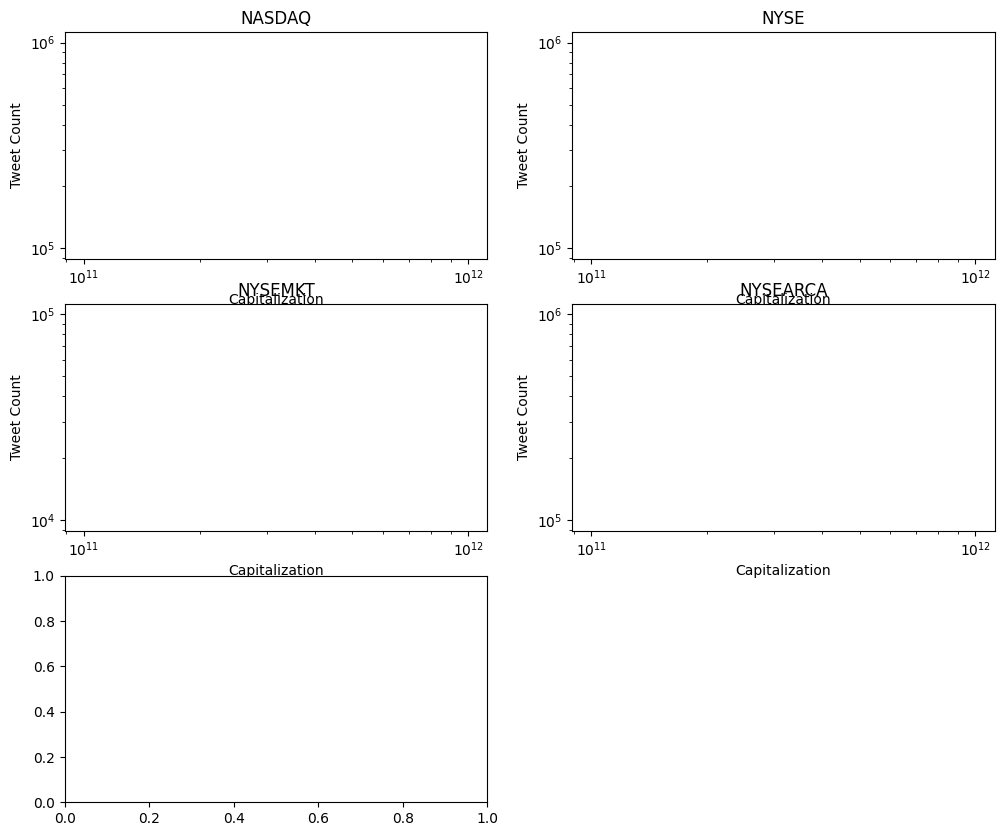

In [ ]:
# Count how many times each cashtag appears
cashtag_counts = entities_df['text'].value_counts()

# Add the counts to the companies dataframe
companies_df['tweet_count'] = companies_df['ticker'].map(cashtag_counts)

# Fill NaN values with 0 for companies that were not tweeted about
companies_df['tweet_count'].fillna(0, inplace=True)

# Filter companies DataFrame for each exchange
nasdaq_companies = companies_df[companies_df['exchange'] == 'NASDAQ']
nyse_companies = companies_df[companies_df['exchange'] == 'NYSE']
nysemkt_companies = companies_df[companies_df['exchange'] == 'NYSEMKT']
nysearca_companies = companies_df[companies_df['exchange'] == 'NYSEARCA']
otcmkt_companies = companies_df[companies_df['exchange'] == 'OTCMKTS']

# Set logarithmic scale for both x-axis and y-axis
plt.figure(figsize=(12, 10))

# NASDAQ
plt.subplot(3, 2, 1)
sns.kdeplot(data=nasdaq_companies, x='capitalization', y='tweet_count')
plt.xscale('log')
plt.yscale('log')
plt.title('NASDAQ')
plt.xlabel('Capitalization')
plt.ylabel('Tweet Count')

# NYSE
plt.subplot(3, 2, 2)
sns.kdeplot(data=nyse_companies, x='capitalization', y='tweet_count')
plt.xscale('log')
plt.yscale('log')
plt.title('NYSE')
plt.xlabel('Capitalization')
plt.ylabel('Tweet Count')

# NYSEMKT
plt.subplot(3, 2, 3)
sns.kdeplot(data=nysemkt_companies, x='capitalization', y='tweet_count')
plt.xscale('log')
plt.yscale('log')
plt.title('NYSEMKT')
plt.xlabel('Capitalization')
plt.ylabel('Tweet Count')

# NYSEARCA
plt.subplot(3, 2, 4)
sns.kdeplot(data=nysearca_companies, x='capitalization', y='tweet_count')
plt.xscale('log')
plt.yscale('log')
plt.title('NYSEARCA')
plt.xlabel('Capitalization')
plt.ylabel('Tweet Count')

# OTCMKTS
plt.subplot(3, 2, 5)
otcmkt_companies.dropna(subset=['capitalization'], inplace=True)
sns.kdeplot(data=otcmkt_companies, x='capitalization', y='tweet_count')
plt.xscale('log')
plt.yscale('log')
plt.title('OTCMKTS')
plt.xlabel('Capitalization')
plt.ylabel('Tweet Count')

plt.tight_layout()
plt.show()